In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
ANSWER_KEY = pd.read_csv('/content/drive/MyDrive/CV_Sample/School/answer_key_school.csv')
ANSWER_KEY.head()

Question Correct Answer
0         1              D
1         2              A
2         3              A
3         4              A
4         5              C

In [ ]:
df = ANSWER_KEY.to_dict('dict')
Answer = df['Correct Answer']
str(Answer)

"{0: 'D', 1: 'A', 2: 'A', 3: 'A', 4: 'C', 5: 'D', 6: 'A', 7: 'D', 8: 'D', 9: 'C', 10: 'C', 11: 'A', 12: 'B', 13: 'B', 14: 'A', 15: 'D', 16: 'C', 17: 'C', 18: 'C', 19: 'D', 20: 'D', 21: 'D', 22: 'B', 23: 'B', 24: 'D', 25: 'A', 26: 'B', 27: 'D', 28: 'A', 29: 'D', 30: 'C', 31: 'C', 32: 'C', 33: 'D', 34: 'A', 35: 'A', 36: 'D', 37: 'D', 38: 'C', 39: 'B', 40: 'C', 41: 'D', 42: 'B', 43: 'B', 44: 'B', 45: 'D', 46: 'B', 47: 'C', 48: 'D', 49: 'A', 50: 'C', 51: 'B', 52: 'C', 53: 'A', 54: 'D', 55: 'A', 56: 'A', 57: 'B', 58: 'B', 59: 'C', 60: 'C', 61: 'D', 62: 'D', 63: 'A', 64: 'C', 65: 'B', 66: 'A', 67: 'C', 68: 'D', 69: 'B', 70: 'C', 71: 'A', 72: 'C', 73: 'B', 74: 'B', 75: 'A', 76: 'A', 77: 'A', 78: 'A', 79: 'A', 80: 'B', 81: 'C', 82: 'D', 83: 'C', 84: 'B', 85: 'D', 86: 'A', 87: 'B', 88: 'C', 89: 'A', 90: 'D', 91: 'D', 92: 'A', 93: 'B', 94: 'C', 95: 'B', 96: 'C', 97: 'B', 98: 'B', 99: 'D', 100: 'C', 101: 'C', 102: 'C', 103: 'D', 104: 'B', 105: 'C', 106: 'C', 107: 'A', 108: 'D', 109: 'A', 110: 'A'

In [ ]:
file = [
      '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_123413.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_123446.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145728.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145753.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145813.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145827.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145838.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145850.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145906.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145922.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145933.jpg',
        '/content/drive/MyDrive/CV_Sample/School/IMG_20210723_150007.jpg'
]

In [ ]:
## HELPER FUNCTIONS FOR WARPING
def four_point_transform(image, pts):
	rect = order_points(pts)
	(tl, tr, br, bl) = rect

	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
 
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")

	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
 
	return warped


def order_points(pts):
	rect = np.zeros((4, 2), dtype = "float32")
 
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]

	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]

	return rect

In [ ]:
def get_xy_coord_of_ans(ques_roi):
  cv2_imshow(ques_roi)
  x_coord,y_coord = -1,-1
  
  cnts,hierarchy = cv2.findContours(ques_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  flag = 0
  
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)

    if  ar >= 0.6 and ar <= 1.5 and w*h > 800:
      if flag == 1:
        return -1, -1
      flag += 1
      x_coord = x
      y_coord = y + h

  return x_coord, y_coord

In [ ]:
def _get_answer_for_block(thresh):
  roi = thresh
  answers = []
  y_coord = 0

  y_drift = roi.shape[0]//50

  initial_drift =  y_drift + 30

  for i in range(50):
    if i == 0: 
      
      ques = roi[y_coord:y_coord + initial_drift,:]
    else:
      ques = roi[y_coord:y_coord + y_drift,:]    

    x_res,y_res = get_xy_coord_of_ans(ques)

    if x_res == -1:
      answers.append('-')
      y_coord += y_drift
    elif x_res > roi.shape[1]/5 and x_res< 2* roi.shape[1]/5:
      answers.append('A')
    elif x_res > 2*roi.shape[1]/5 and x_res< 3* roi.shape[1]/5:
      answers.append('B')
    elif x_res > 3*roi.shape[1]/5 and x_res< 4* roi.shape[1]/5:
      answers.append('C')
    else:
      answers.append('D')

    print(answers[-1])

    ## If there is a bounding box found, we use its y coordinates to shift to the next row
    if x_res != -1:
      y_coord += y_res

  return answers


In [ ]:
def get_cnts(closed):
  cnts, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cnts = sorted(cnts, key = lambda x:cv2.contourArea(x), reverse=True)

  nice_cntrs = []
  for c in cnts:
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.02 * peri, True)

      if len(approx) == 4:
        area = cv2.contourArea(c)
        (x, y, w, h) = cv2.boundingRect(c)
        aspectRatio = w / float(h)

        if aspectRatio >=0.15 and aspectRatio<=0.3 and w*h>2000:
          nice_cntrs.append(approx)
          
  nice_cntrs = sorted(nice_cntrs, key = lambda x: cv2.contourArea(x), reverse = True)[:4]
  return nice_cntrs

In [ ]:
def process_image(filepath):
  im = cv2.imread(filepath,0)
  blurred = cv2.GaussianBlur(im, (11, 11), 0)
  edged = cv2.Canny(blurred, 75, 200)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
  closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel,iterations = 4)  
  nice_cntrs = get_cnts(closed)
  warped = []
  for cnt in nice_cntrs:
    warped.append(four_point_transform(im, cnt.reshape(4, 2)))
  return warped

In [ ]:
def get_answer_dict(warped):
  ans = []
  for item in warped:
    thresh = cv2.threshold(item, 0, 255,
      cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 1)
    ans_temp = _get_answer_for_block(thresh)
    ans += ans_temp
    
  i = 0
  solution = {}
  for x in ans:
    solution[i] = x
    i += 1
  
  return solution


In [ ]:
def get_score(sstudent_solution, answer_key):
  correct = 0
  for item in list(answer_key.keys()):
    if answer_key[item] == sstudent_solution[item]:
      correct += 1

  print("Score = " + str(correct) + "/200")
  return correct

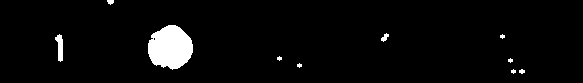

A


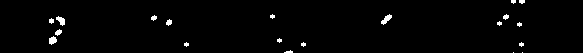

-


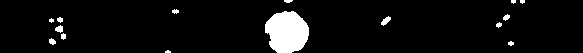

B


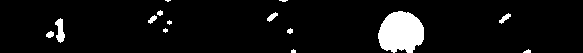

C


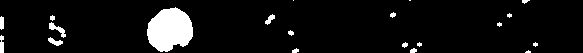

A


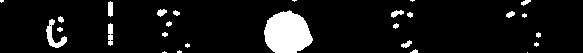

B


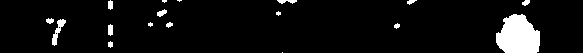

D


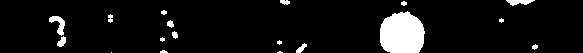

C


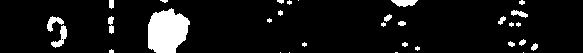

A


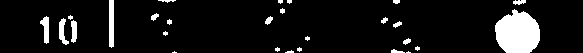

D


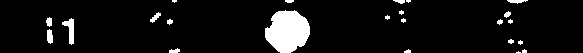

B


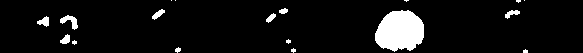

C


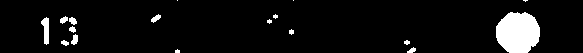

D


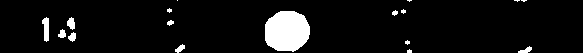

B


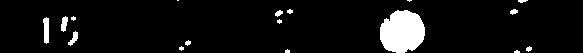

C


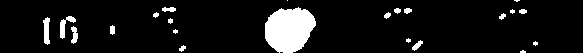

B


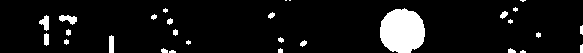

C


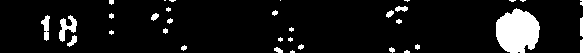

D


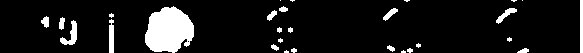

A


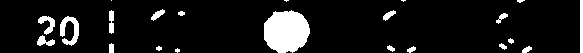

B


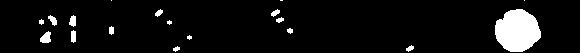

D


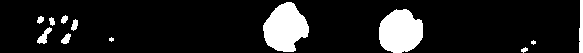

-


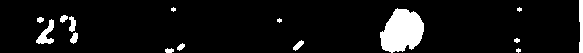

C


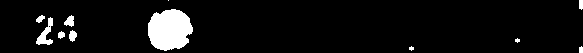

A


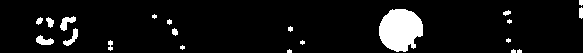

C


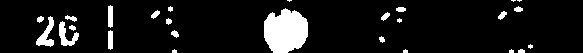

B


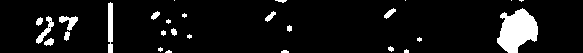

D


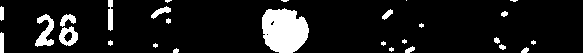

B


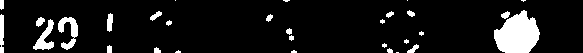

D


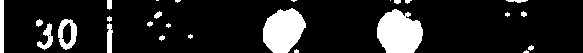

-


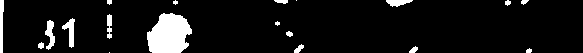

A


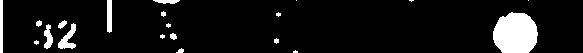

D


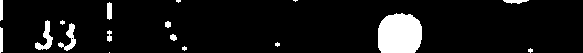

C


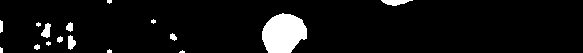

B


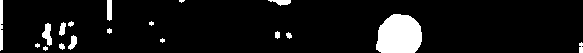

C


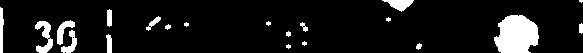

D


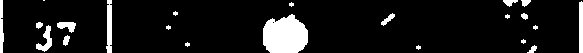

B


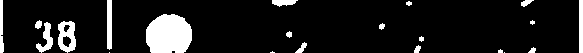

A


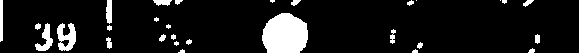

B


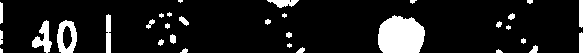

C


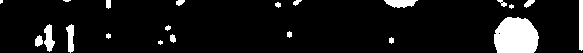

D


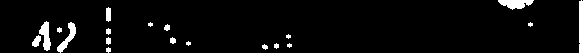

-


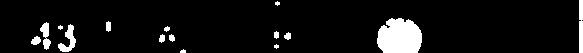

C


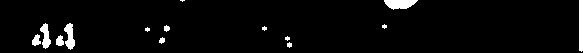

-


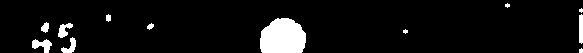

B


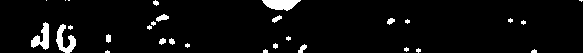

-


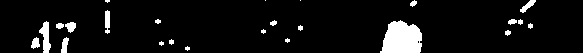

C


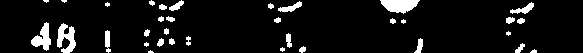

-


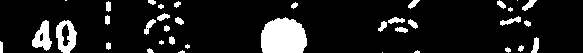

B


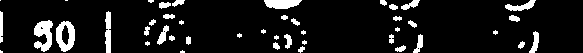

-


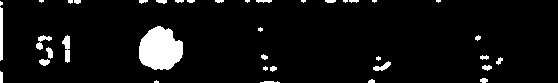

A


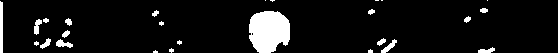

B


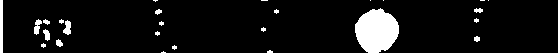

C


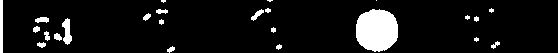

C


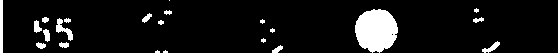

C


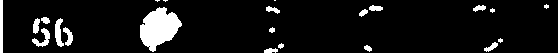

A


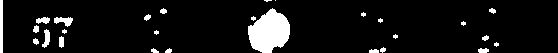

B


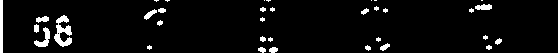

-


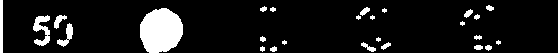

A


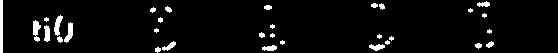

-


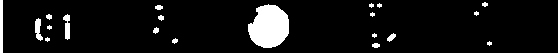

B


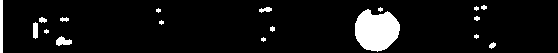

C


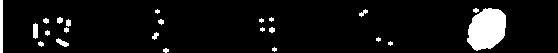

D


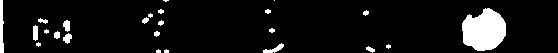

D


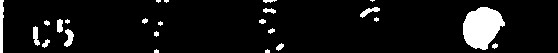

D


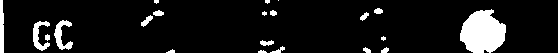

D


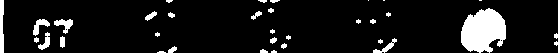

D


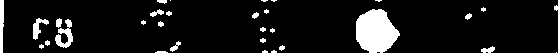

C


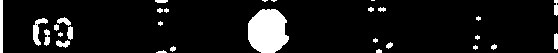

B


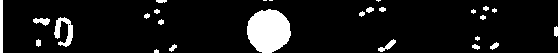

B


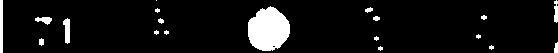

B


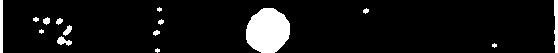

B


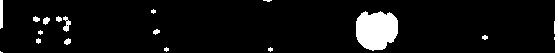

C


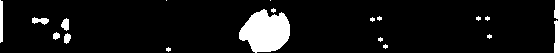

B


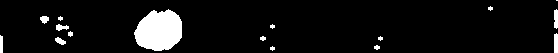

A


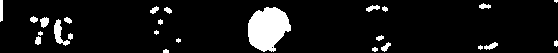

B


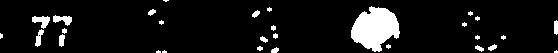

C


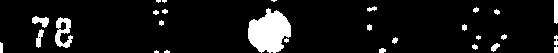

B


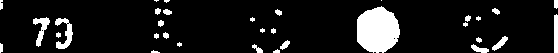

C


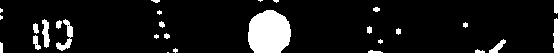

B


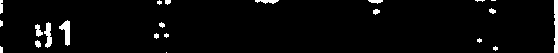

-


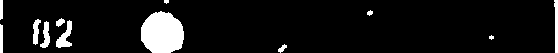

A


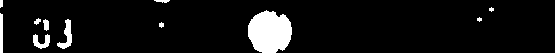

B


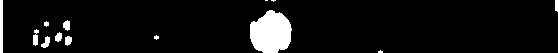

B


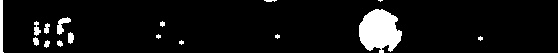

C


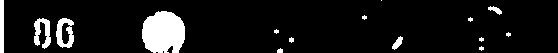

A


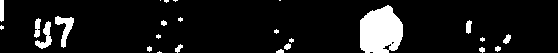

C


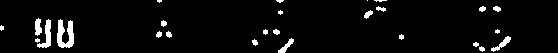

-


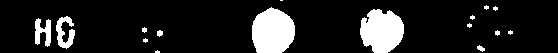

-


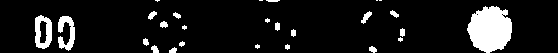

D


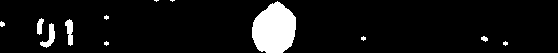

B


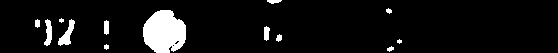

A


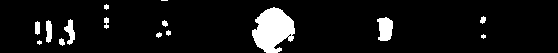

B


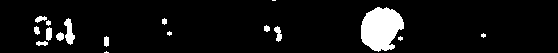

C


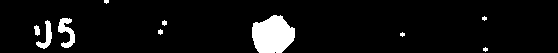

B


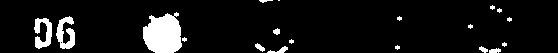

A


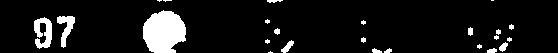

A


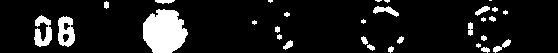

A


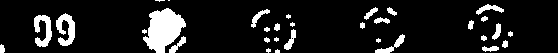

A


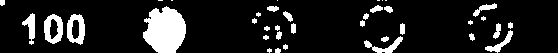

A


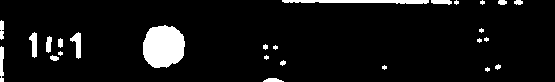

A


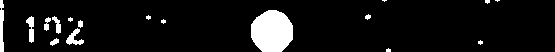

B


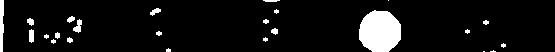

C


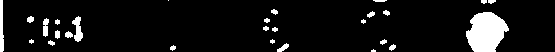

D


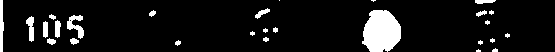

C


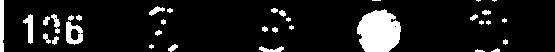

C


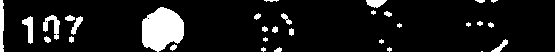

A


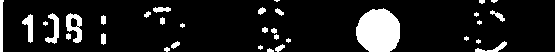

C


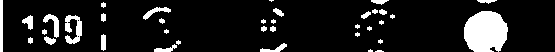

D


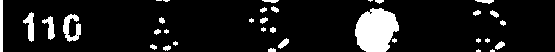

C


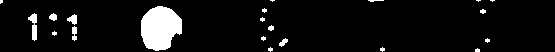

A


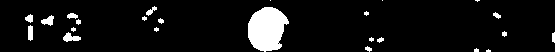

B


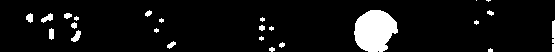

C


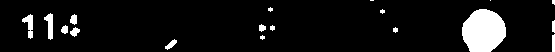

D


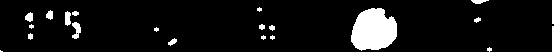

C


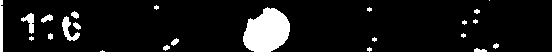

B


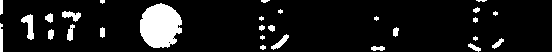

A


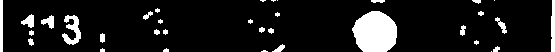

C


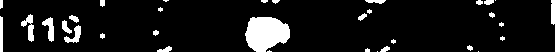

B


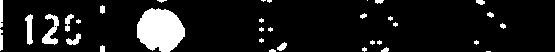

A


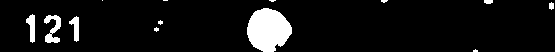

B


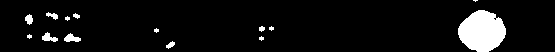

D


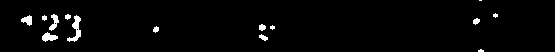

-


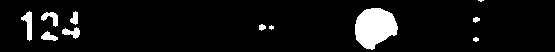

C


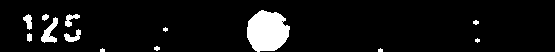

B


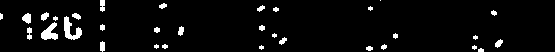

-


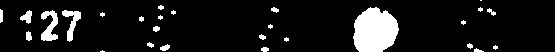

C


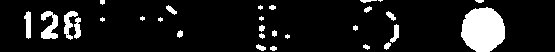

D


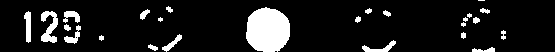

B


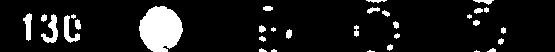

A


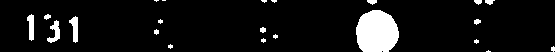

C


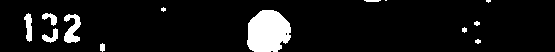

B


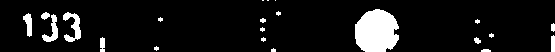

C


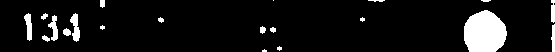

D


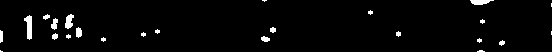

-


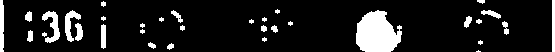

C


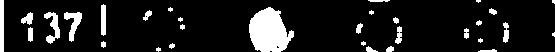

B


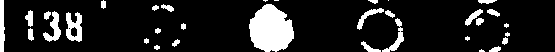

B


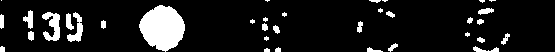

A


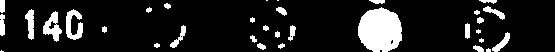

C


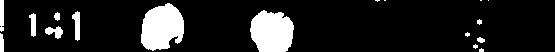

-


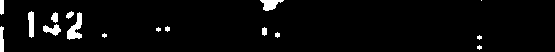

-


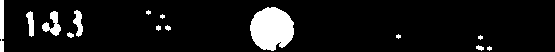

B


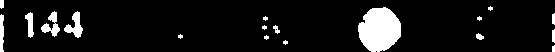

C


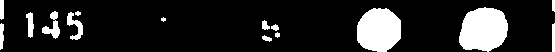

-


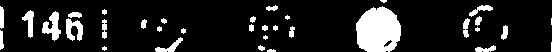

C


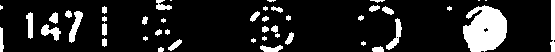

D


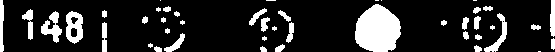

C


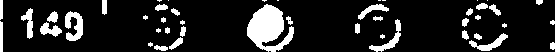

-


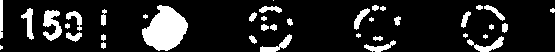

A


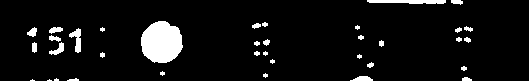

A


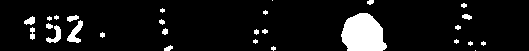

C


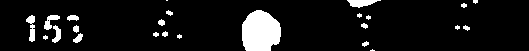

B


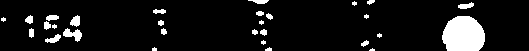

D


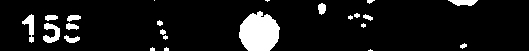

B


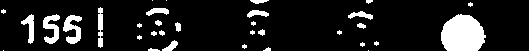

D


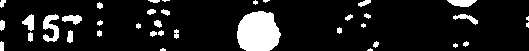

B


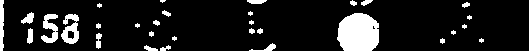

C


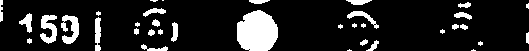

B


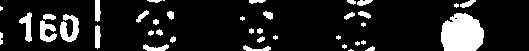

D


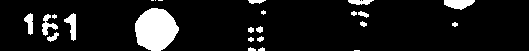

A


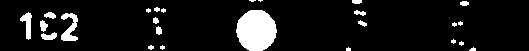

B


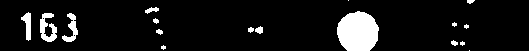

C


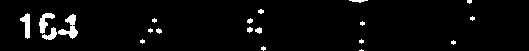

-


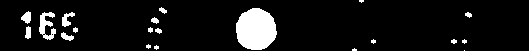

B


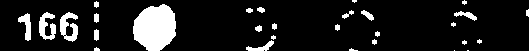

A


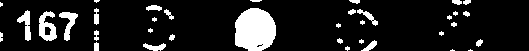

B


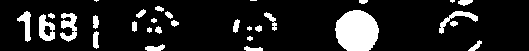

C


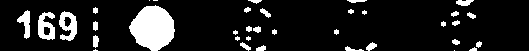

A


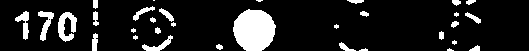

B


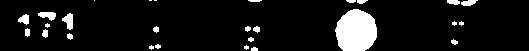

C


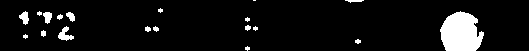

D


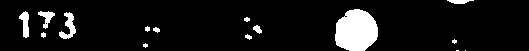

C


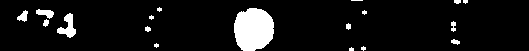

B


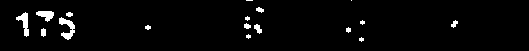

-


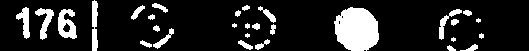

C


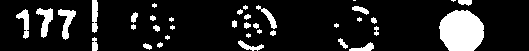

D


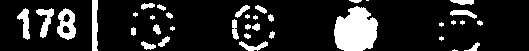

C


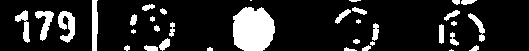

B


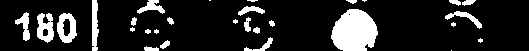

C


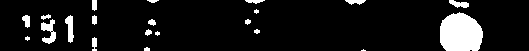

D


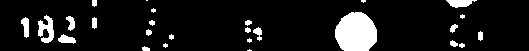

C


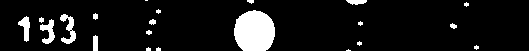

B


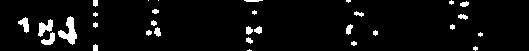

-


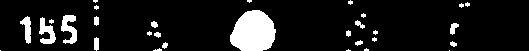

B


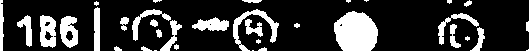

-


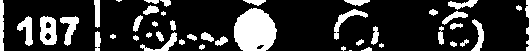

-


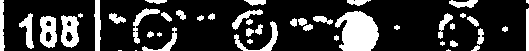

-


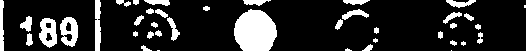

B


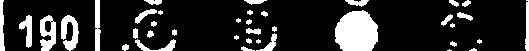

C


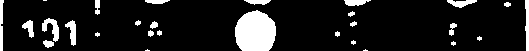

B


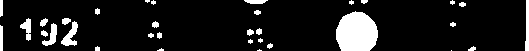

C


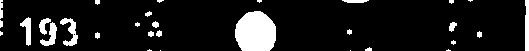

B


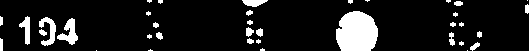

C


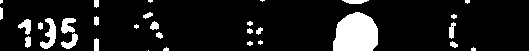

C


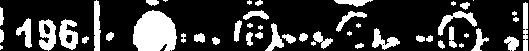

A


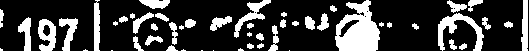

-


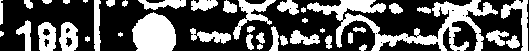

-


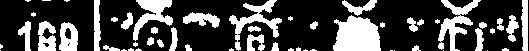

-


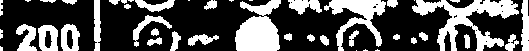

-
Image: IMG_20210723_123413.jpg
Score = 44/200


44

In [ ]:
warped = process_image('/content/drive/MyDrive/CV_Sample/School/IMG_20210723_123413.jpg')
sol = get_answer_dict(warped)
print('Image: IMG_20210723_123413.jpg')
get_score(sol, Answer)

In [ ]:
for item in file:
  warped = process_image(item)
  sol = get_answer_dict(warped)
  print(item)
  try:
    score = get_score(sol, Answer)
  except:
    print('unable to process')

/content/drive/MyDrive/CV_Sample/School/IMG_20210723_123413.jpg
Score = 44/200
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_123446.jpg
Score = 43/200
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145728.jpg
Score = 41/200
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145753.jpg
Score = 0/200
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145813.jpg
Score = 44/200
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145827.jpg
Score = 0/200
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145838.jpg
unable to process
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145850.jpg
Score = 41/200
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145906.jpg
unable to process
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145922.jpg
unable to process
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_145933.jpg
unable to process
/content/drive/MyDrive/CV_Sample/School/IMG_20210723_150007.jpg
Score = 31/200


In [ ]:
warped = process_image('/content/drive/MyDrive/CV_Sample/School/IMG_20210723_123413.jpg')
sol = get_answer_dict(warped)



---



---



In [ ]:
im = cv2.imread(file[0],0)
im.shape

(4624, 3472)

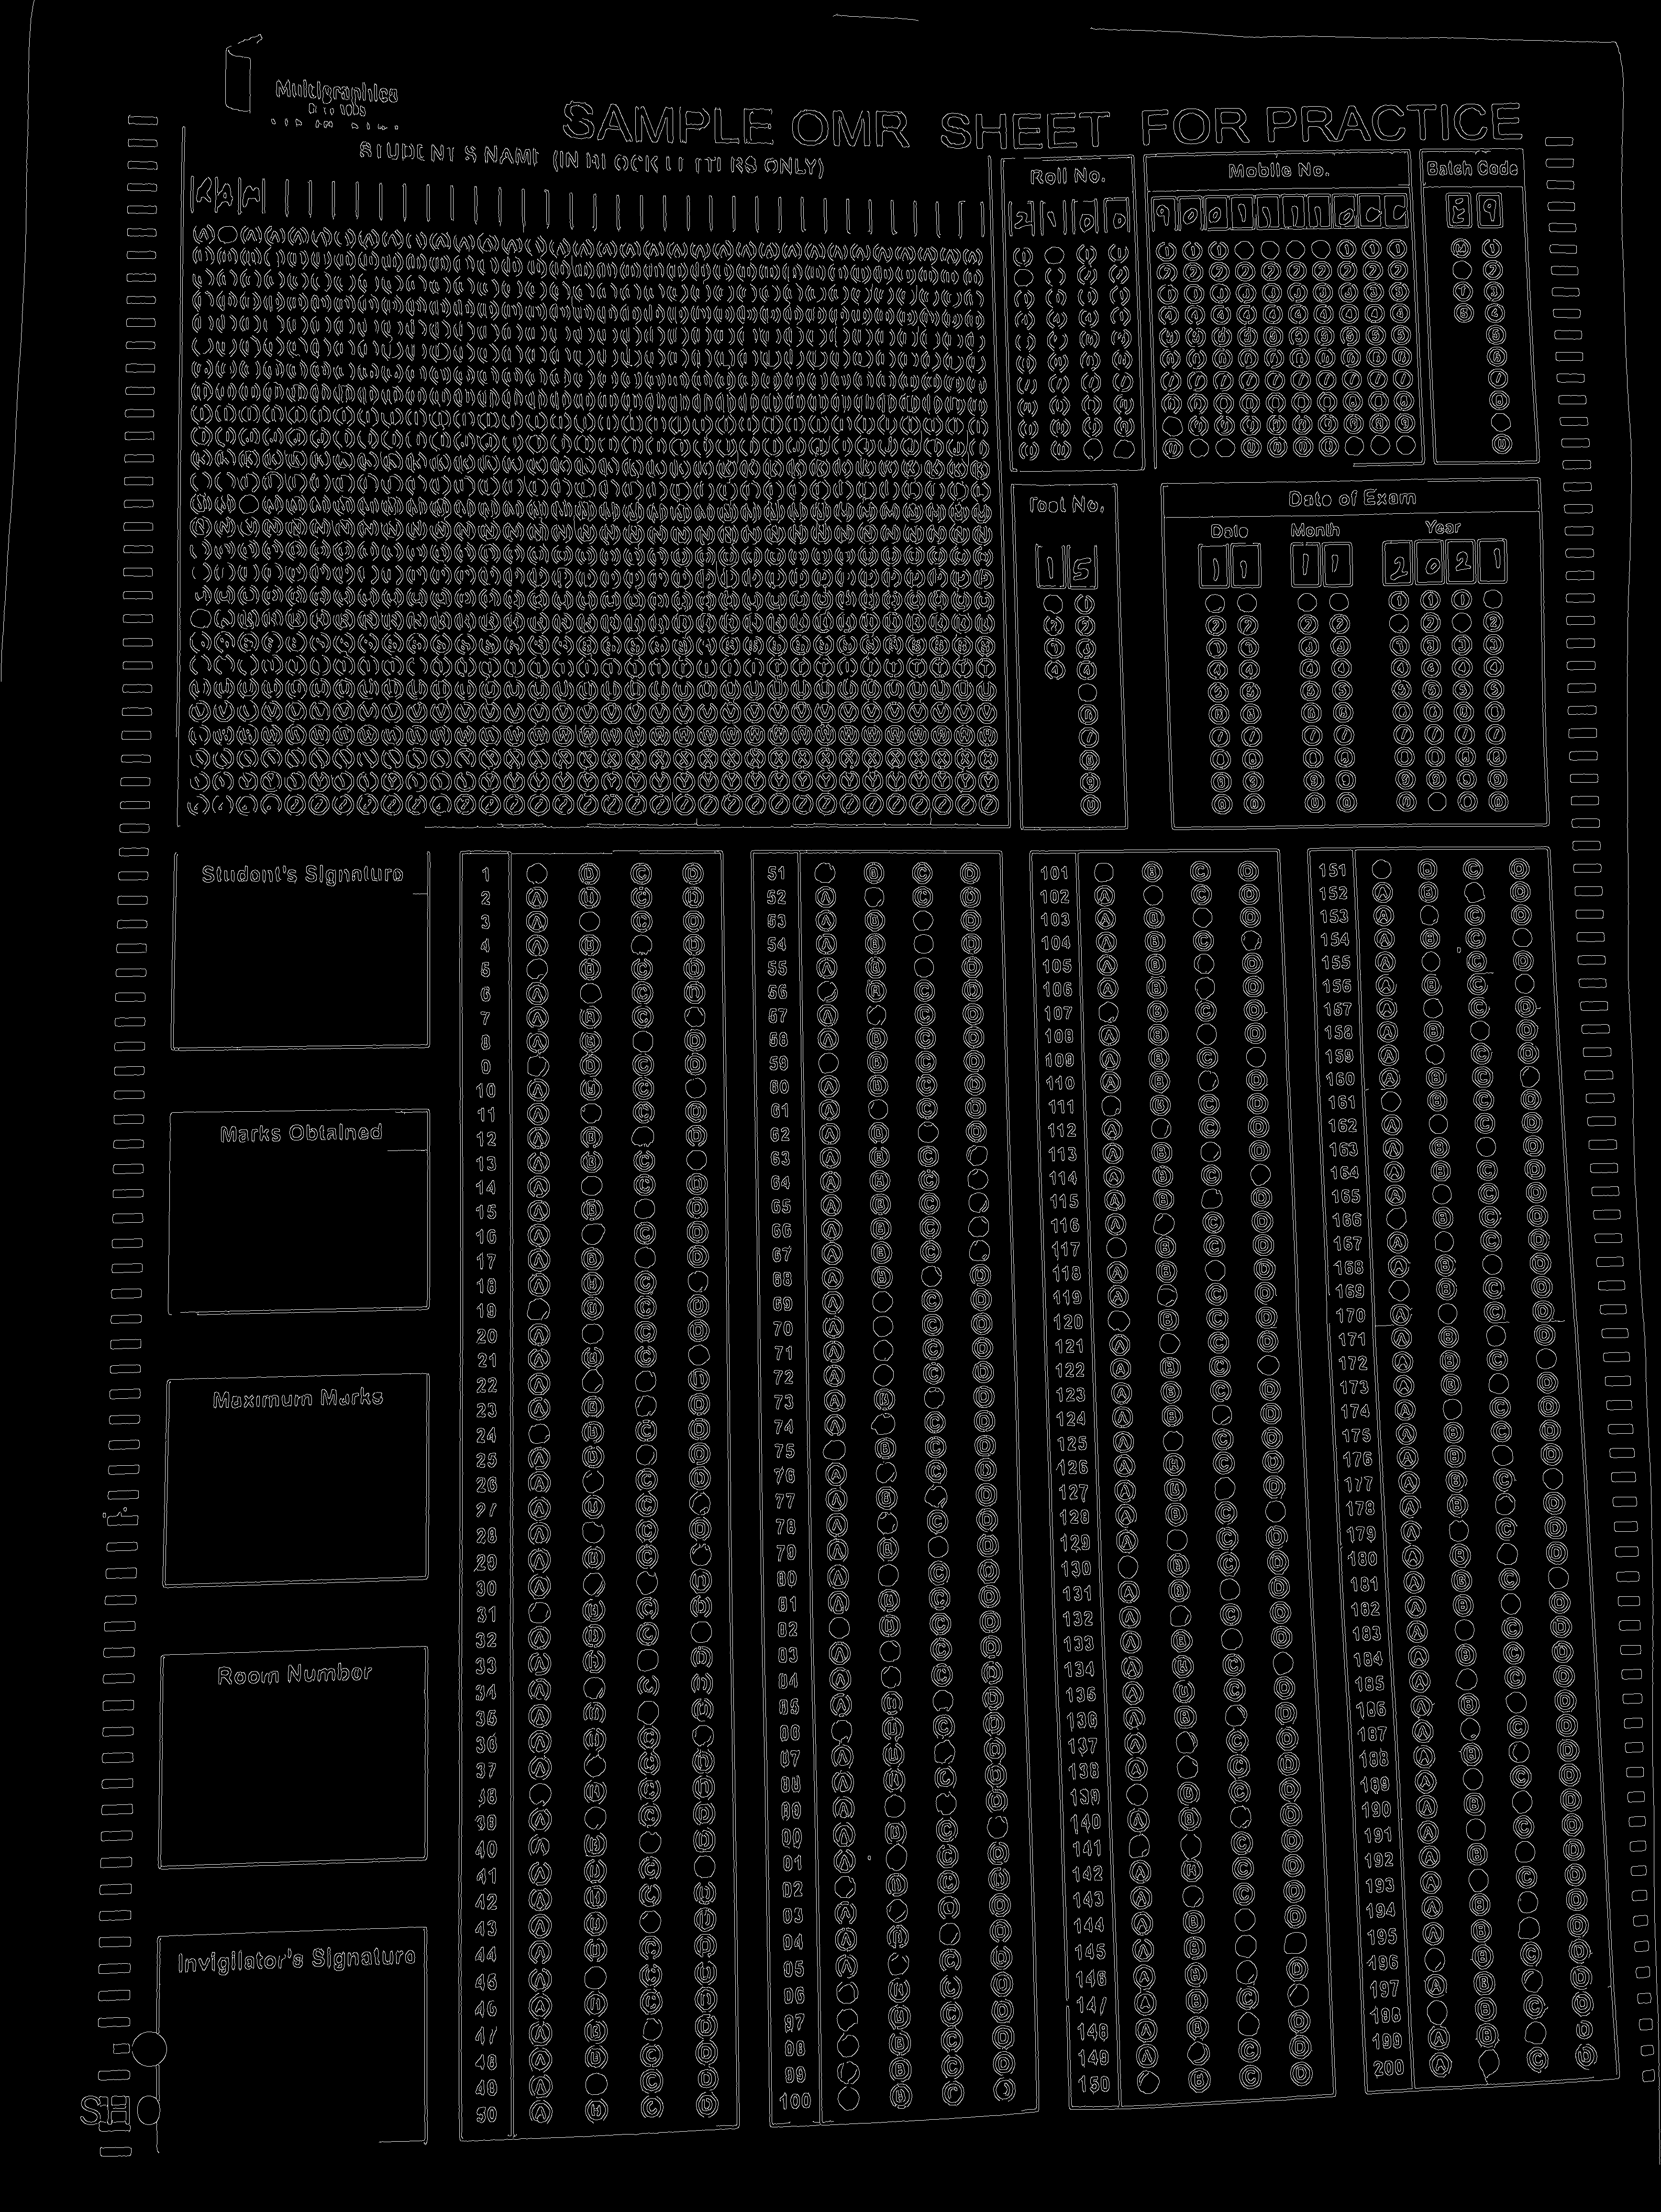

In [ ]:
blurred = cv2.GaussianBlur(im, (11, 11), 0)
edged = cv2.Canny(blurred, 75, 200)
cv2_imshow(edged)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel,iterations = 4)

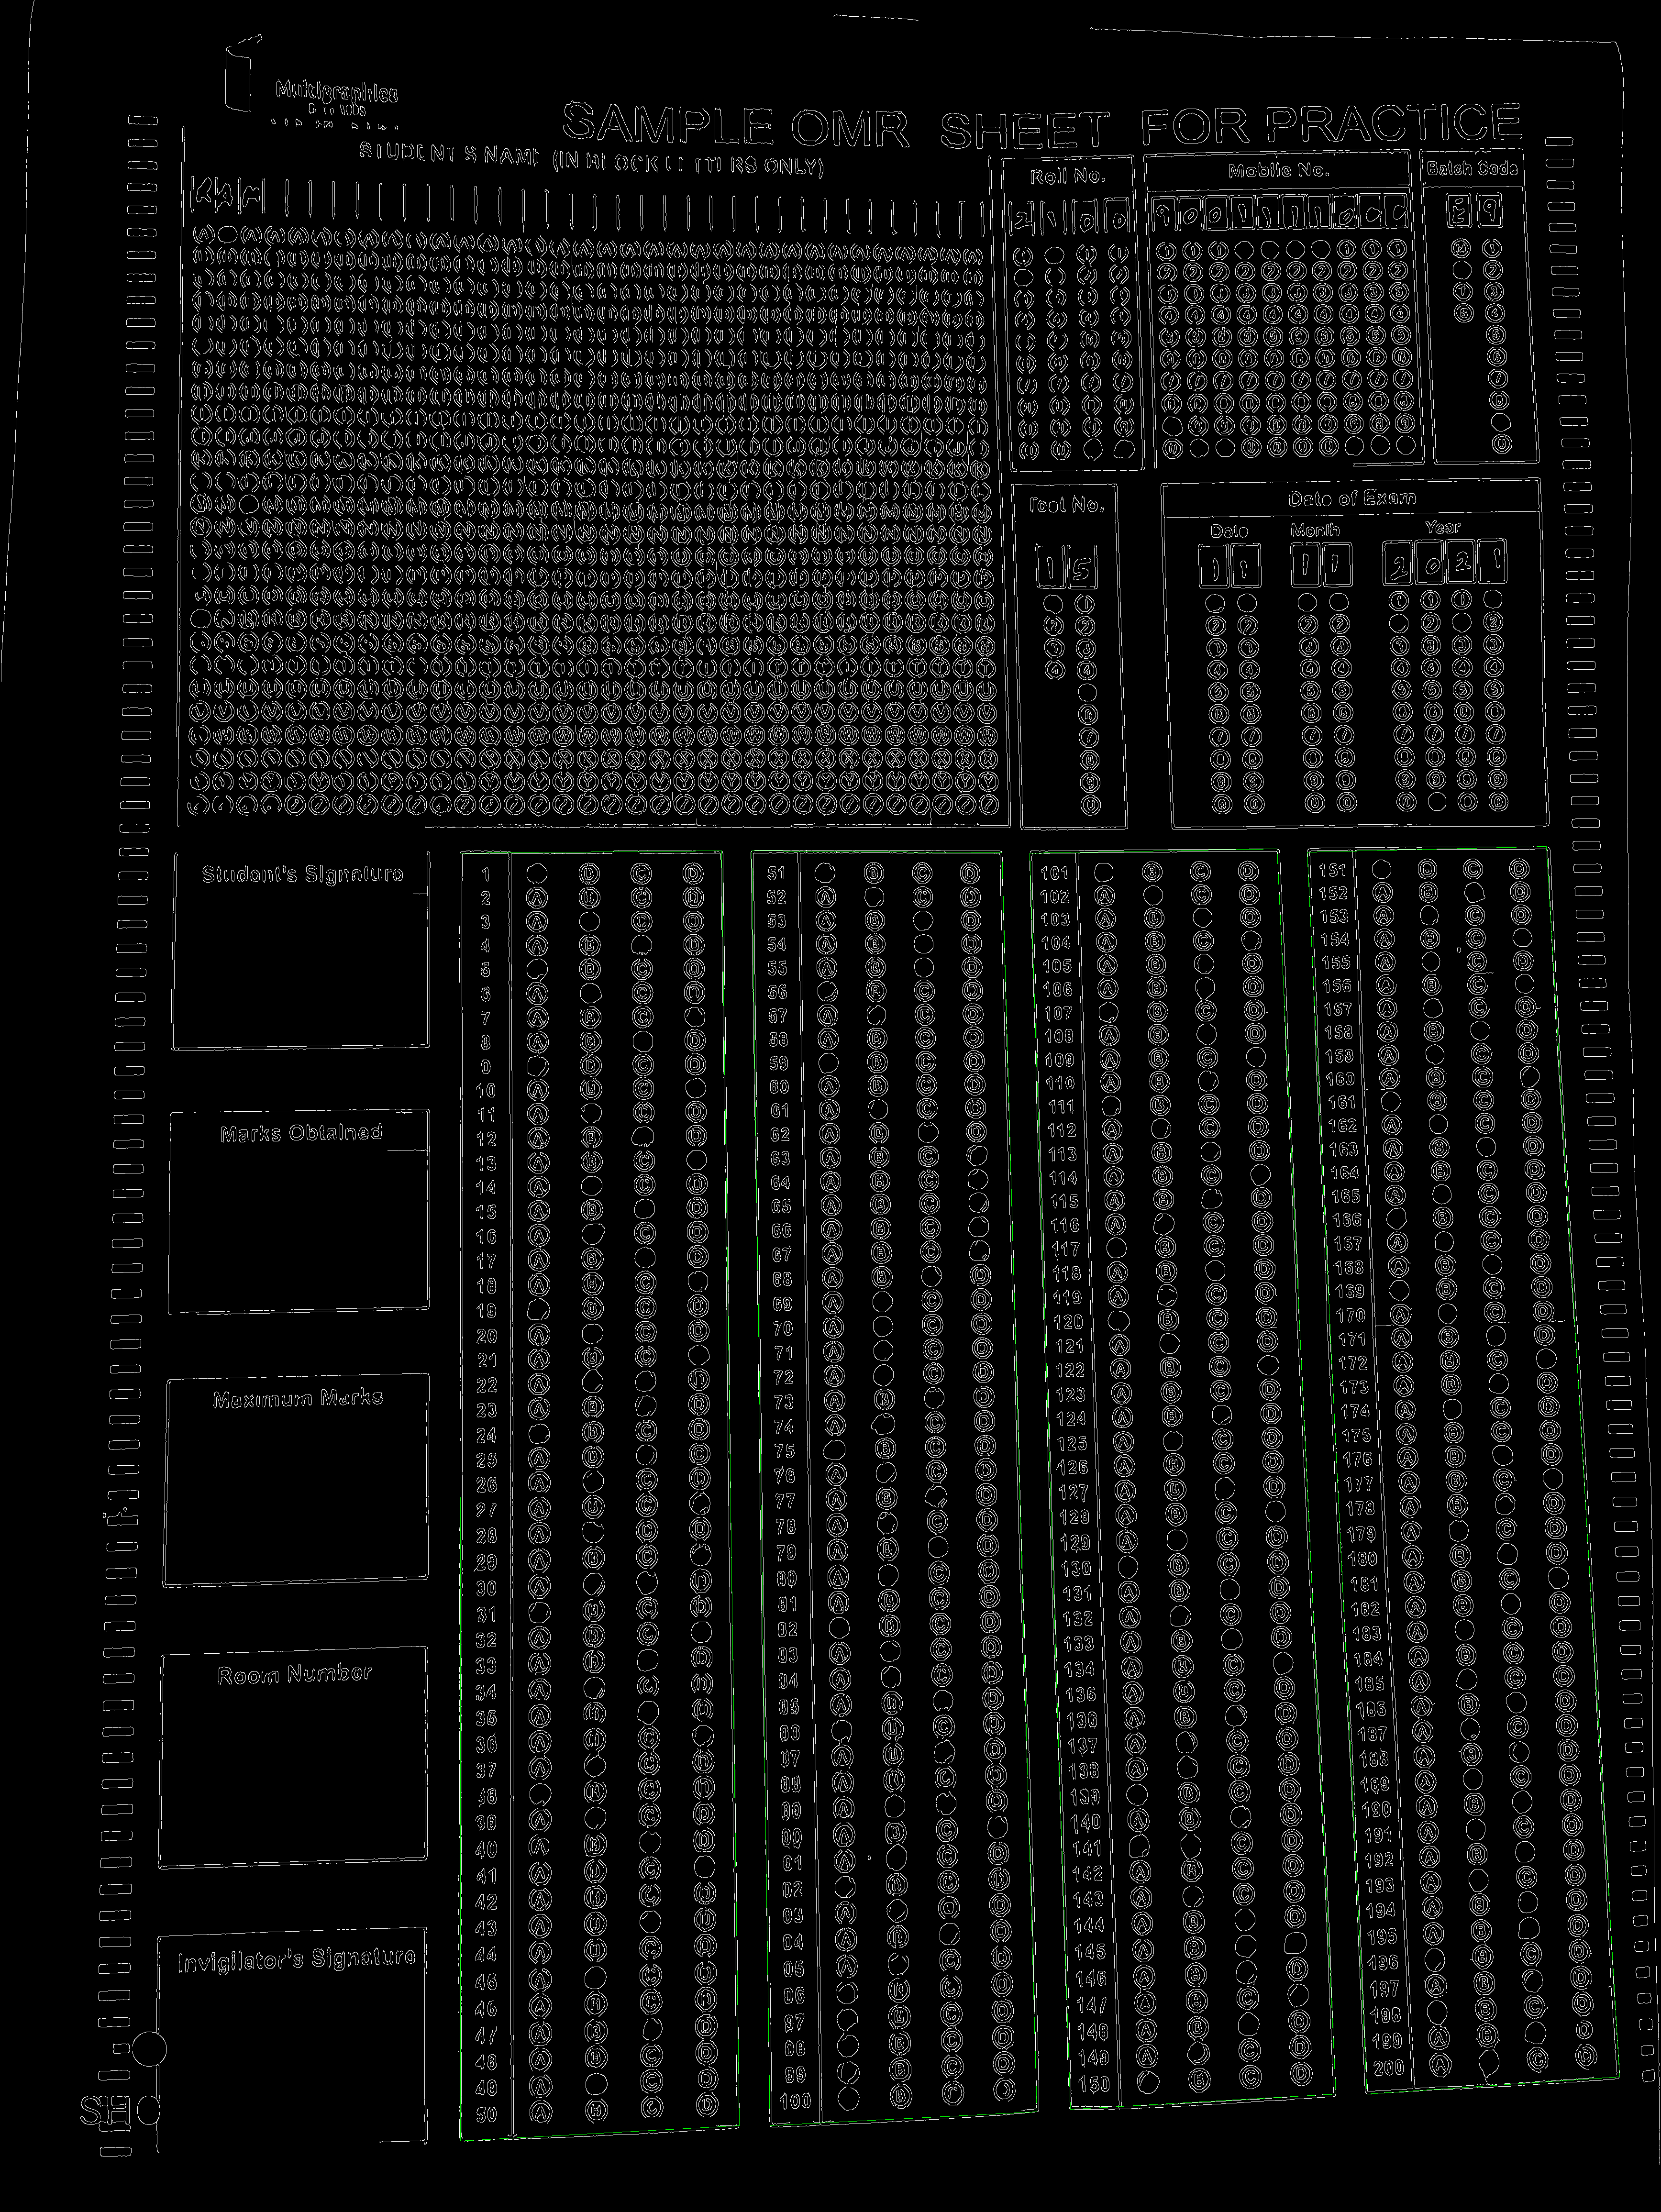

In [ ]:
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = lambda x:cv2.contourArea(x), reverse=True)

nice_cntrs = []
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
      # to compute the aspect ratio
      area = cv2.contourArea(c)
      (x, y, w, h) = cv2.boundingRect(c)

      # compute the aspect ratio of the contour, which is simply the width
      # divided by the height of the bounding box
      aspectRatio = w / float(h)

      if aspectRatio >=0.15 and aspectRatio<=0.3 and w*h>2000:
        nice_cntrs.append(approx)
        
nice_cntrs = sorted(nice_cntrs, key = lambda x: cv2.contourArea(x), reverse = True)[:4]
im_copy = cv2.cvtColor(edged,cv2.COLOR_GRAY2BGR)
drawn_conts = cv2.drawContours(im_copy, nice_cntrs, -1, (0,255,0))
# cv2_imshow(drawn_conts)


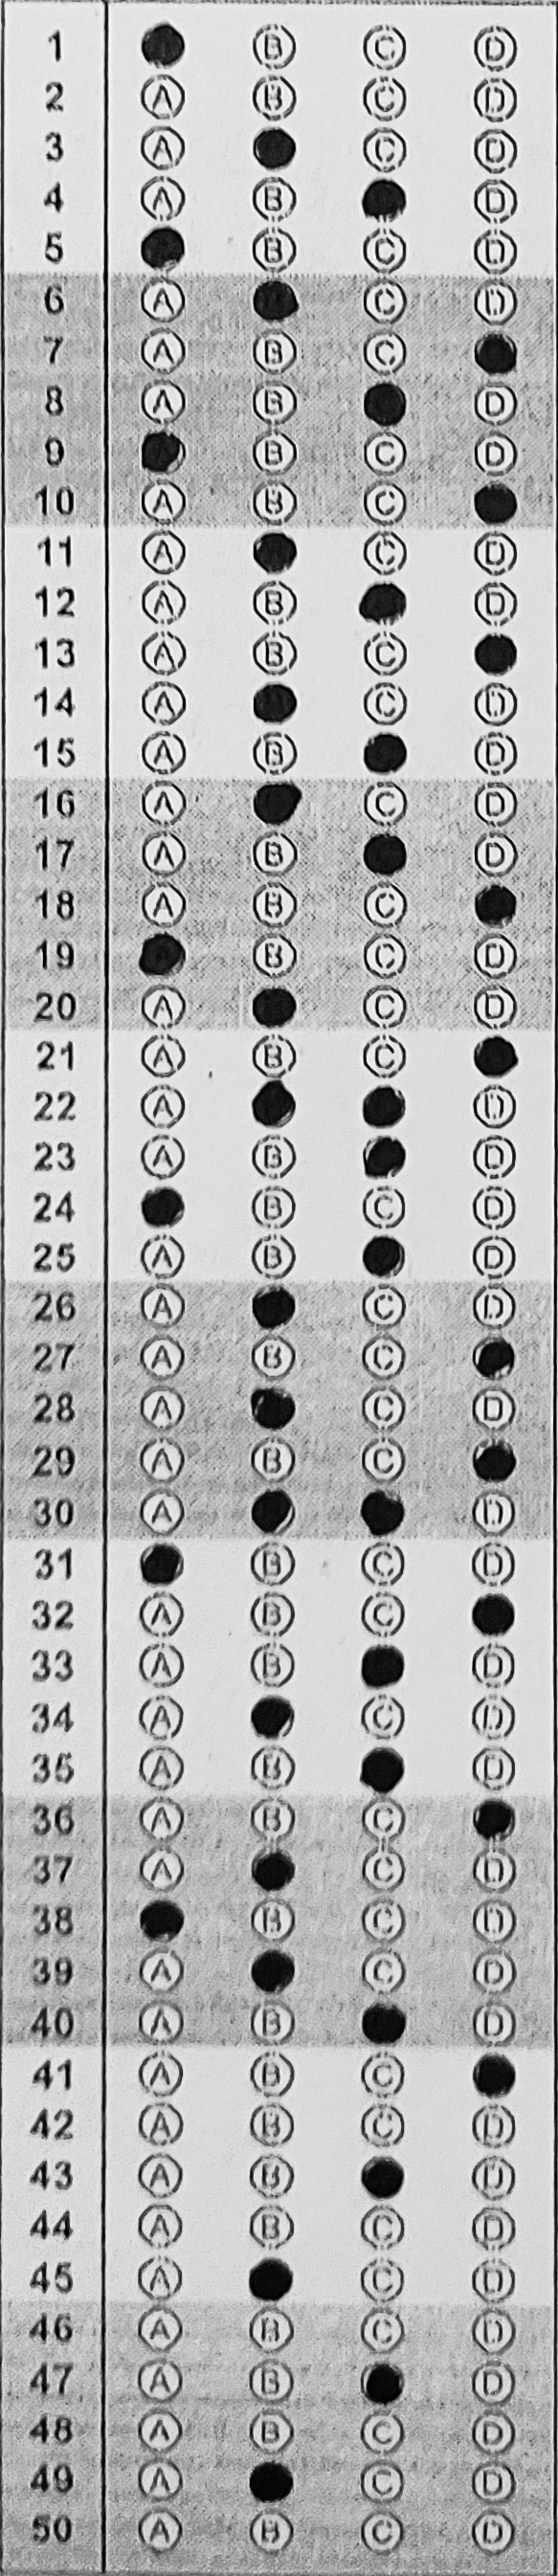

In [ ]:
warped = []
for cnt in nice_cntrs:
  warped.append(four_point_transform(im, cnt.reshape(4, 2)))
# cv2_imshow(warped[0])

In [ ]:
thresh = cv2.threshold(warped[0], 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 1)

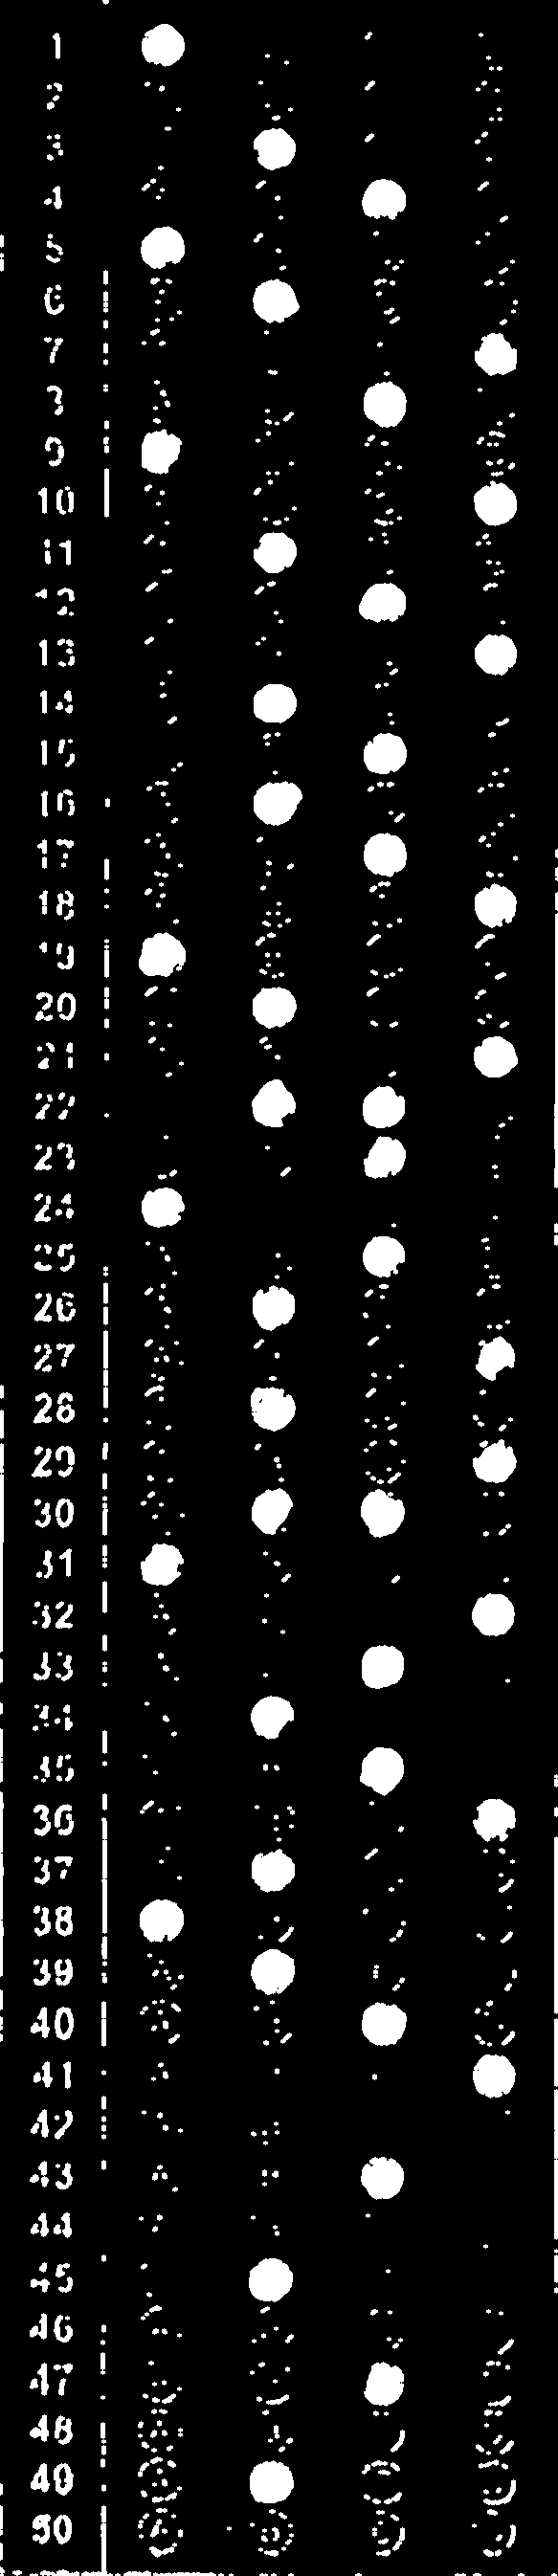

In [ ]:
# cv2_imshow(thresh)

In [ ]:
import pandas as pd
df = pd.read_excel('/content/413_446_728.xlsx')
df.head()

Question Correct Answer 123413 123446 145728
0         1              D      A      A      A
1         2              A      -      D      B
2         3              A      B      C      C
3         4              A      C      A      B
4         5              C      A      C      D

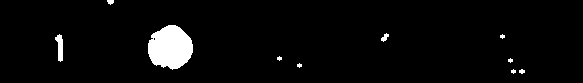

A


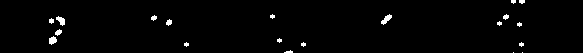

-


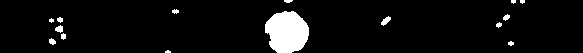

B


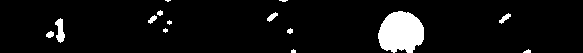

C


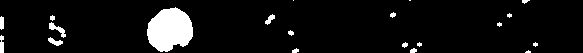

A


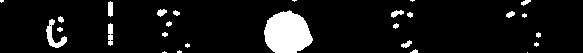

B


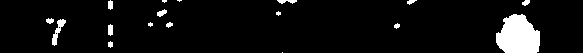

D


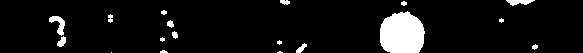

C


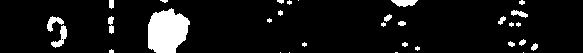

A


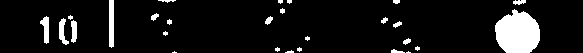

D


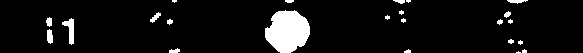

B


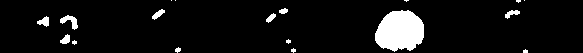

C


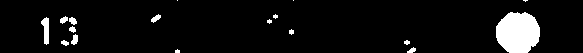

D


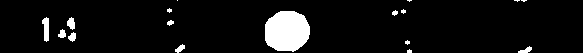

B


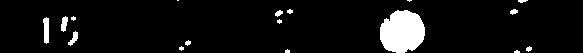

C


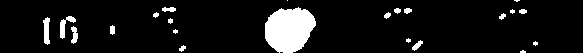

B


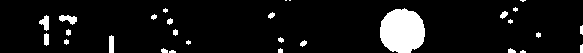

C


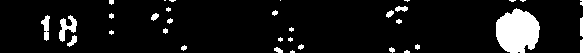

D


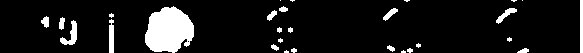

A


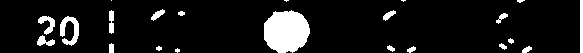

B


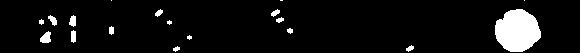

D


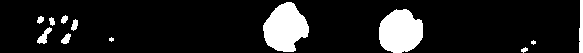

-


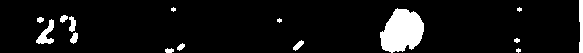

C


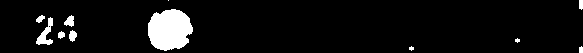

A


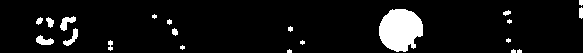

C


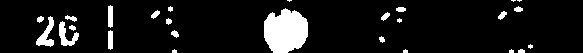

B


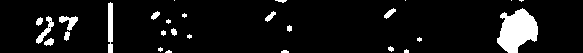

D


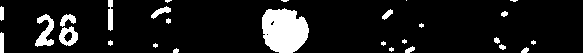

B


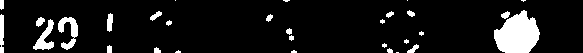

D


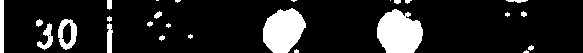

-


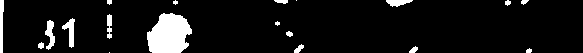

A


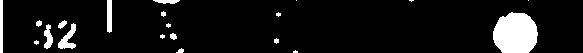

D


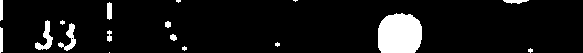

C


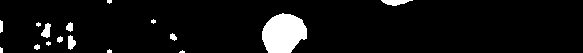

B


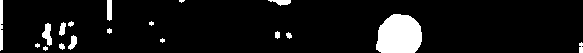

C


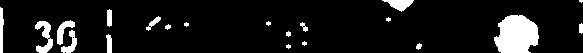

D


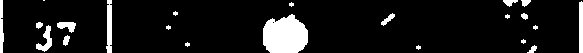

B


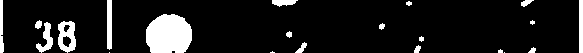

A


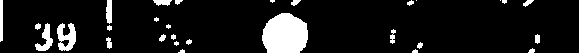

B


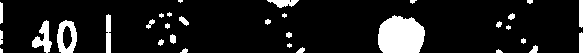

C


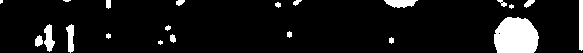

D


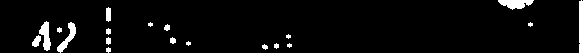

-


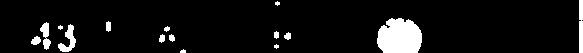

C


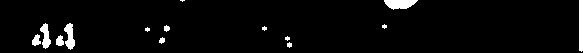

-


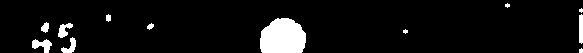

B


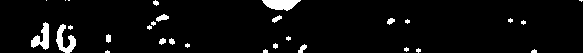

-


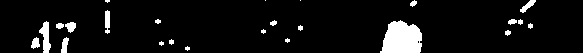

C


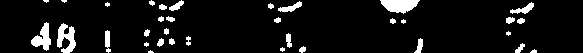

-


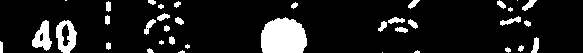

B


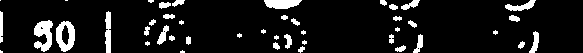

-


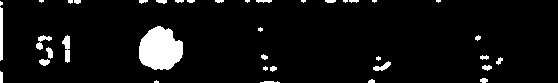

A


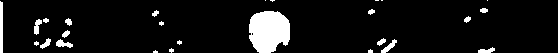

B


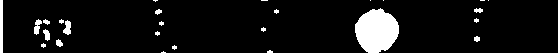

C


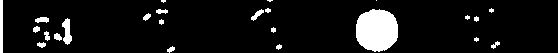

C


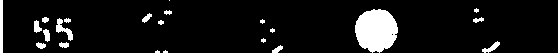

C


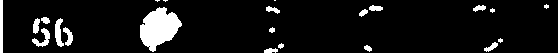

A


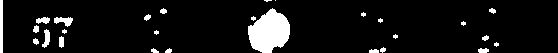

B


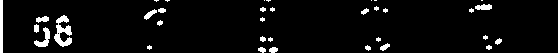

-


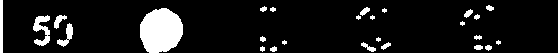

A


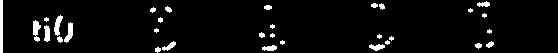

-


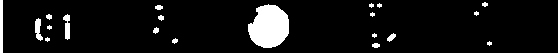

B


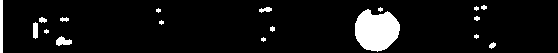

C


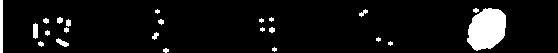

D


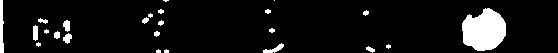

D


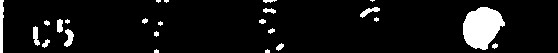

D


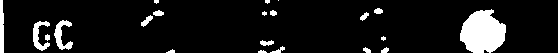

D


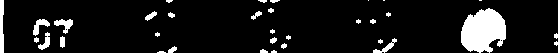

D


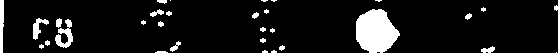

C


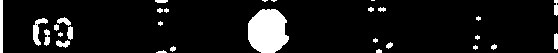

B


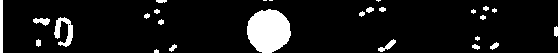

B


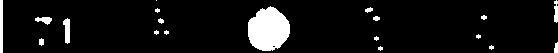

B


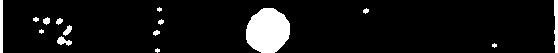

B


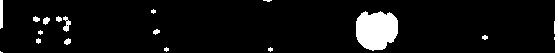

C


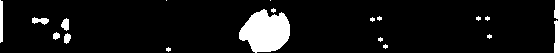

B


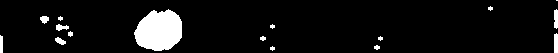

A


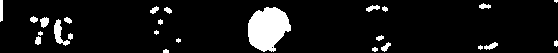

B


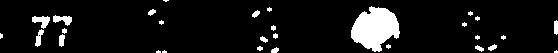

C


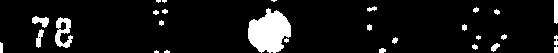

B


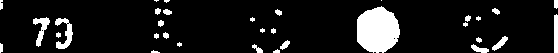

C


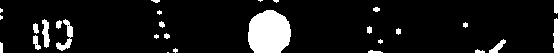

B


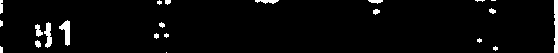

-


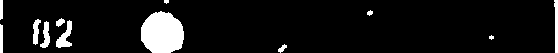

A


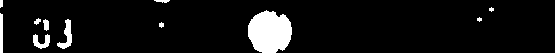

B


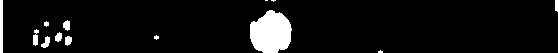

B


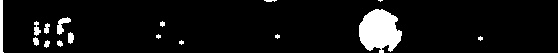

C


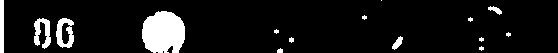

A


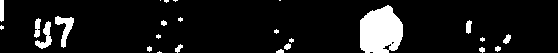

C


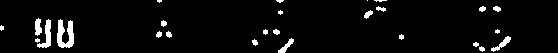

-


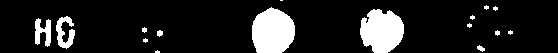

-


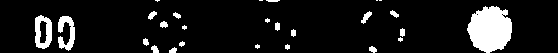

D


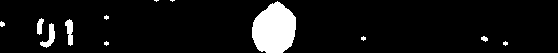

B


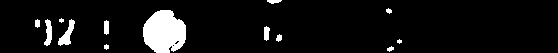

A


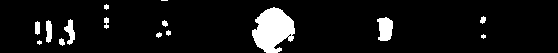

B


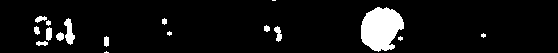

C


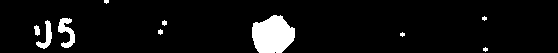

B


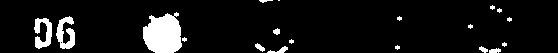

A


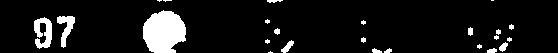

A


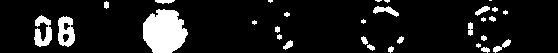

A


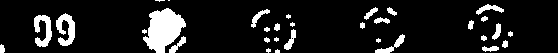

A


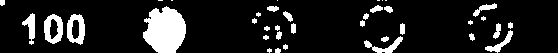

A


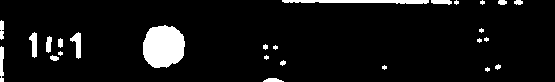

A


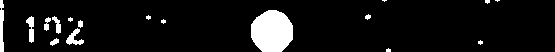

B


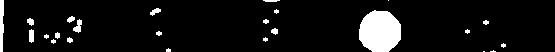

C


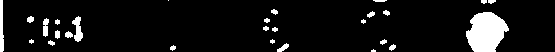

D


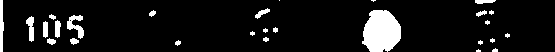

C


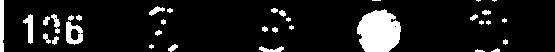

C


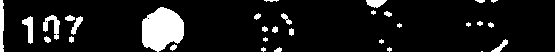

A


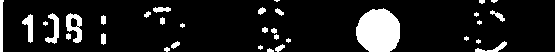

C


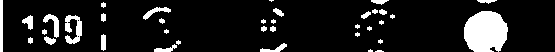

D


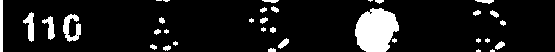

C


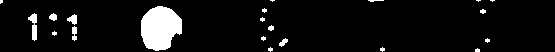

A


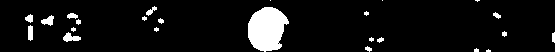

B


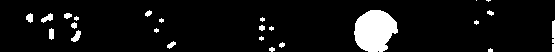

C


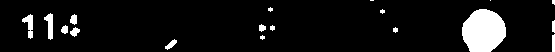

D


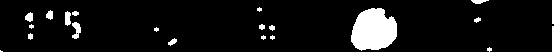

C


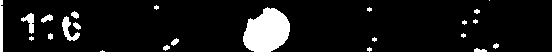

B


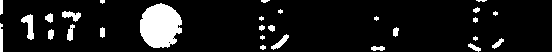

A


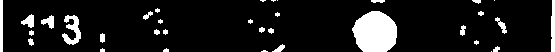

C


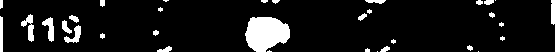

B


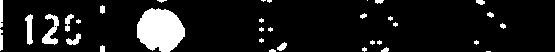

A


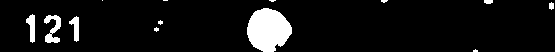

B


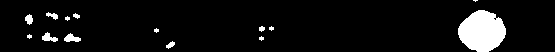

D


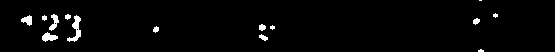

-


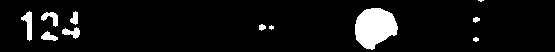

C


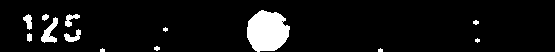

B


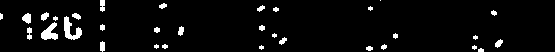

-


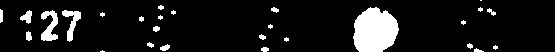

C


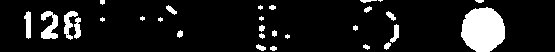

D


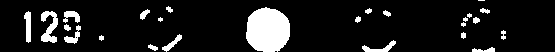

B


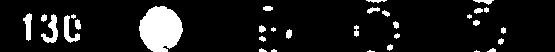

A


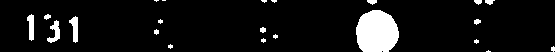

C


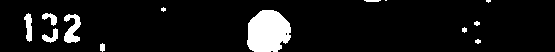

B


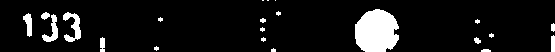

C


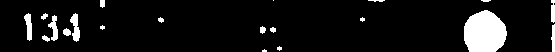

D


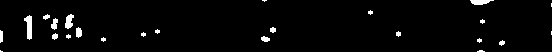

-


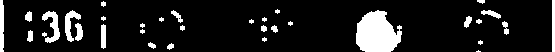

C


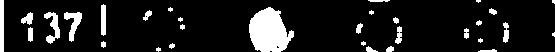

B


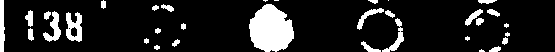

B


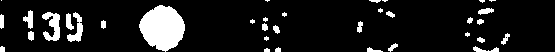

A


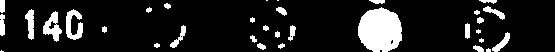

C


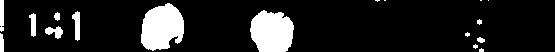

-


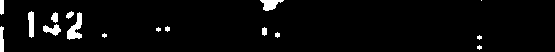

-


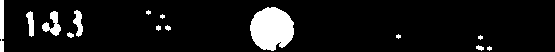

B


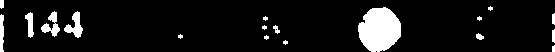

C


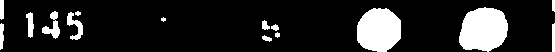

-


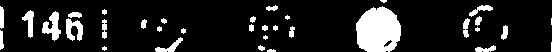

C


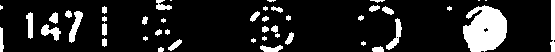

D


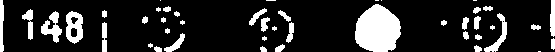

C


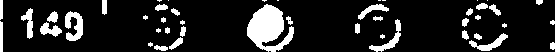

-


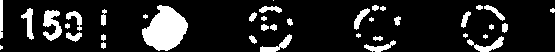

A


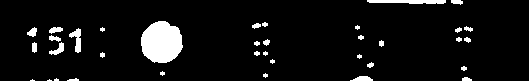

A


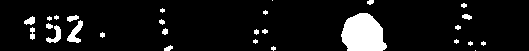

C


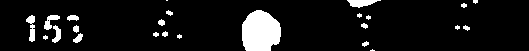

B


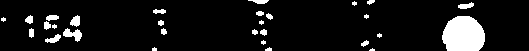

D


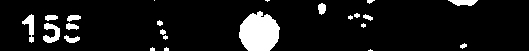

B


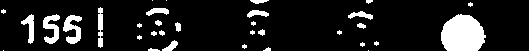

D


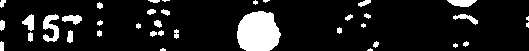

B


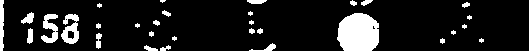

C


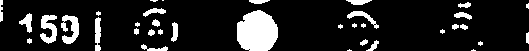

B


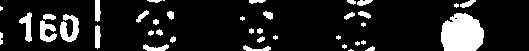

D


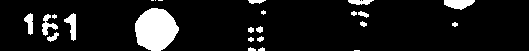

A


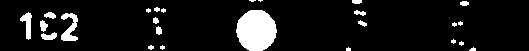

B


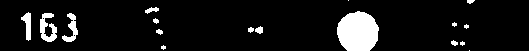

C


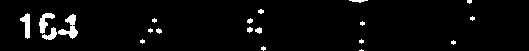

-


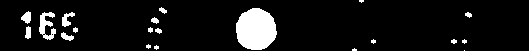

B


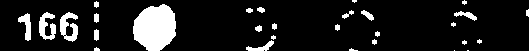

A


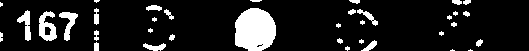

B


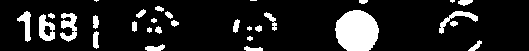

C


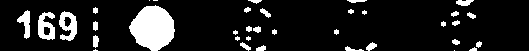

A


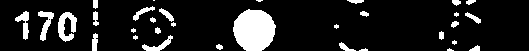

B


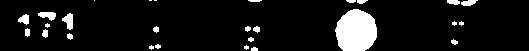

C


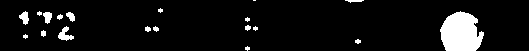

D


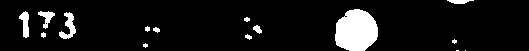

C


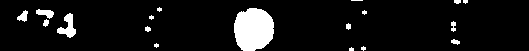

B


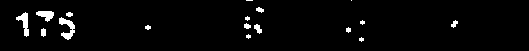

-


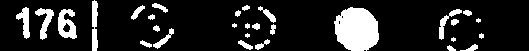

C


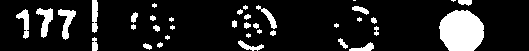

D


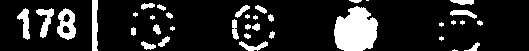

C


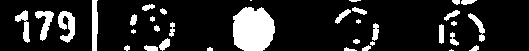

B


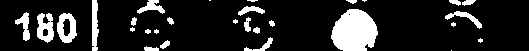

C


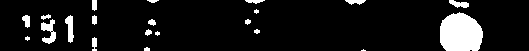

D


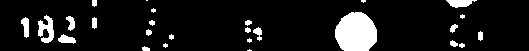

C


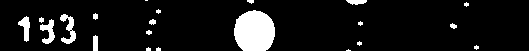

B


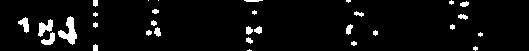

-


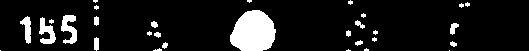

B


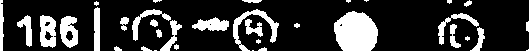

-


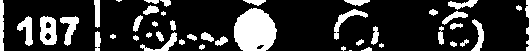

-


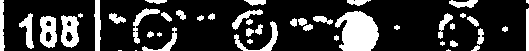

-


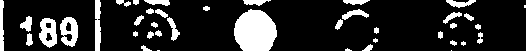

B


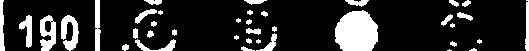

C


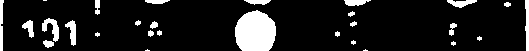

B


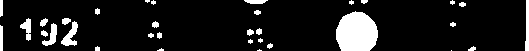

C


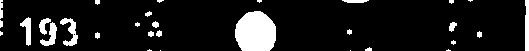

B


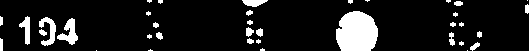

C


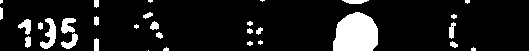

C


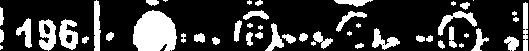

A


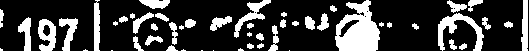

-


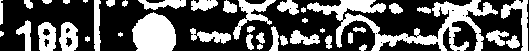

-


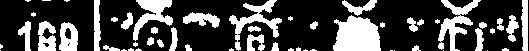

-


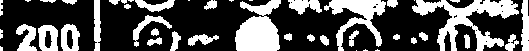

-


In [ ]:
ans = []
for item in warped:
  thresh = cv2.threshold(item, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
  thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 1)
  ans_temp = _get_answer_for_block(thresh)
  ans += ans_temp

df['option_selection'] = ans

i = 0
solution = {}
for x in ans:
  solution[i] = x
  i += 1

In [ ]:
correct = 0
for item in list(Answer.keys()):
  if Answer[item] == solution[item]:
    correct += 1

print("Score = " + str(correct) + "/200")

Score = 44/200


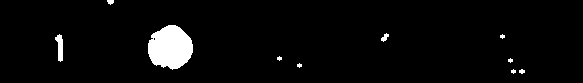

A


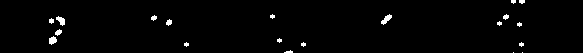

-


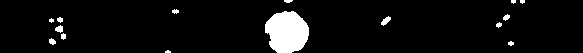

B


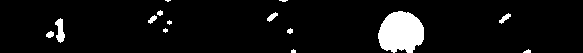

C


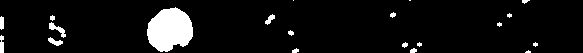

A


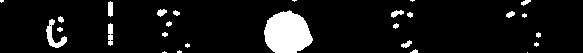

B


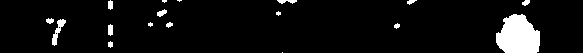

D


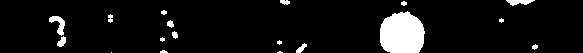

C


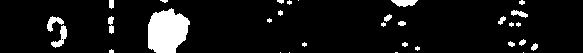

A


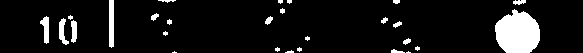

D


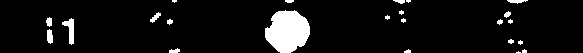

B


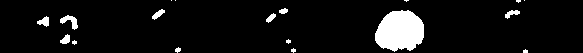

C


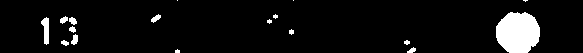

D


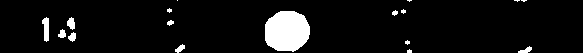

B


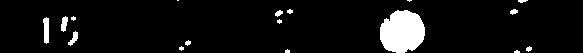

C


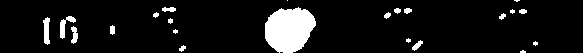

B


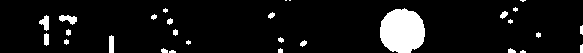

C


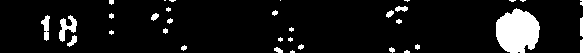

D


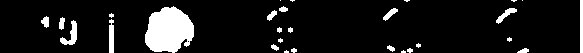

A


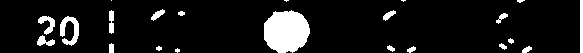

B


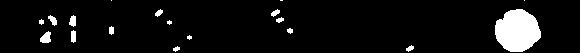

D


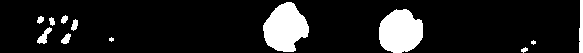

-


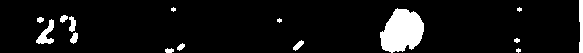

C


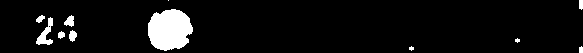

A


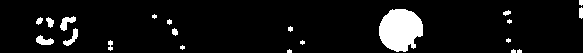

C


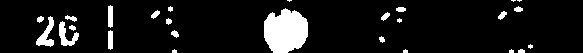

B


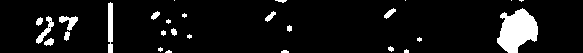

D


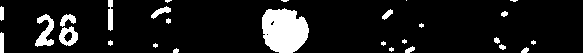

B


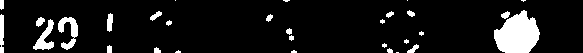

D


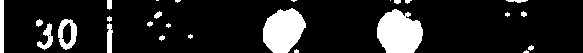

-


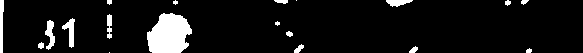

A


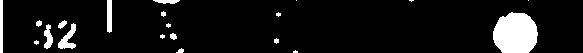

D


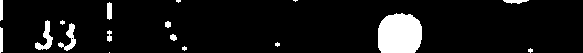

C


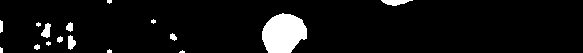

B


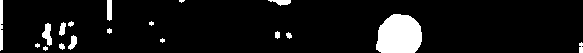

C


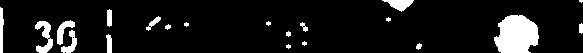

D


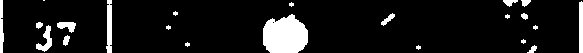

B


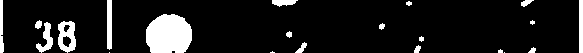

A


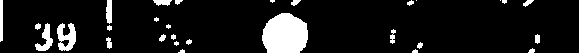

B


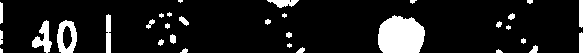

C


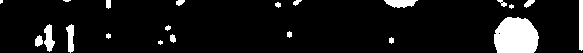

D


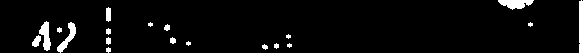

-


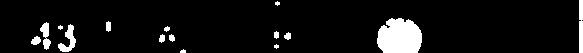

C


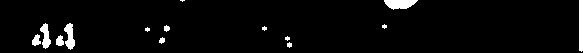

-


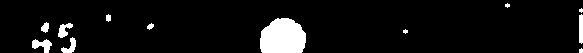

B


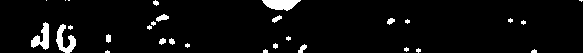

-


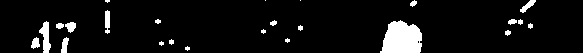

C


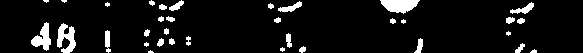

-


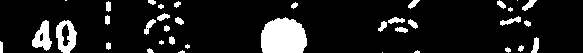

B


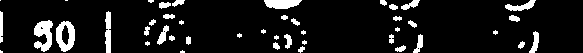

-


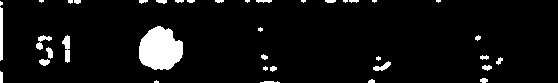

A


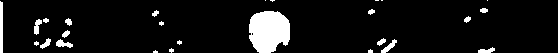

B


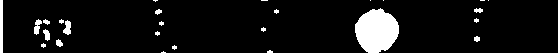

C


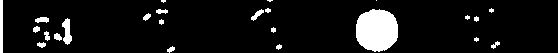

C


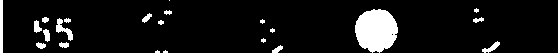

C


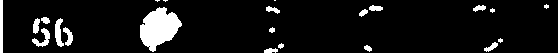

A


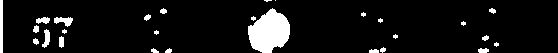

B


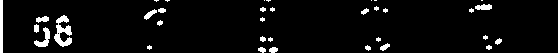

-


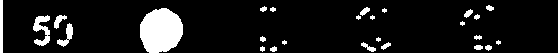

A


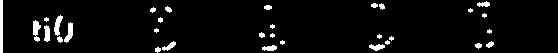

-


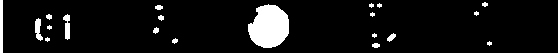

B


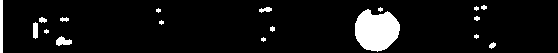

C


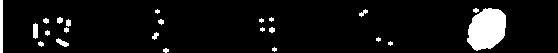

D


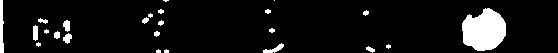

D


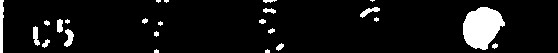

D


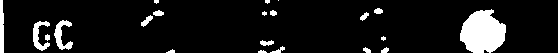

D


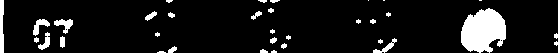

D


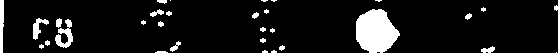

C


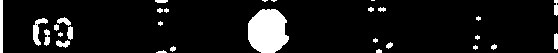

B


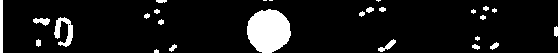

B


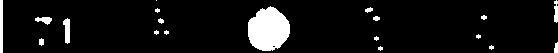

B


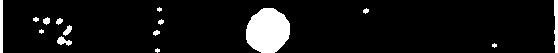

B


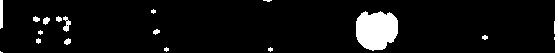

C


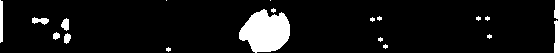

B


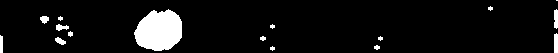

A


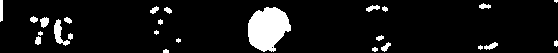

B


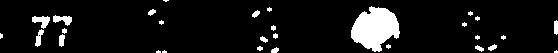

C


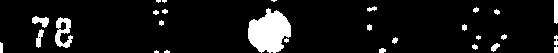

B


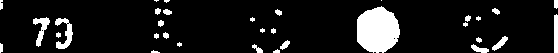

C


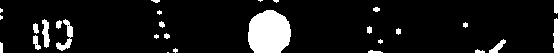

B


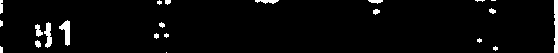

-


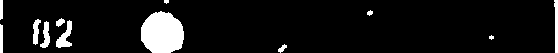

A


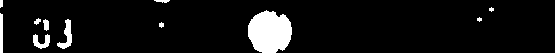

B


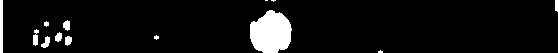

B


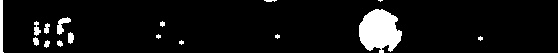

C


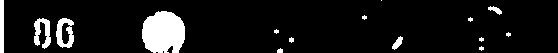

A


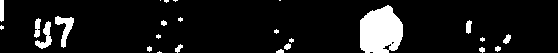

C


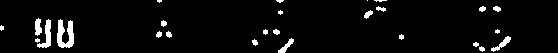

-


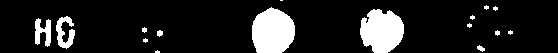

-


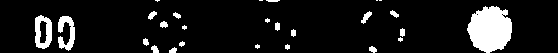

D


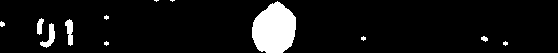

B


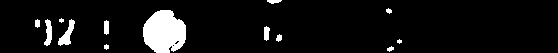

A


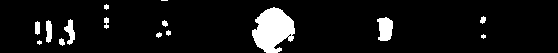

B


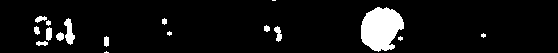

C


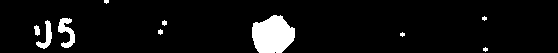

B


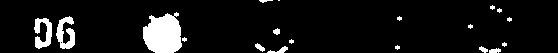

A


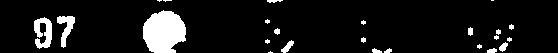

A


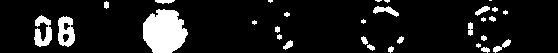

A


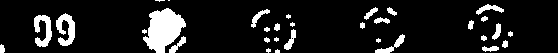

A


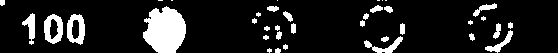

A


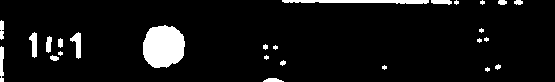

A


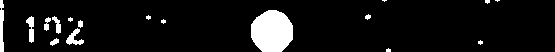

B


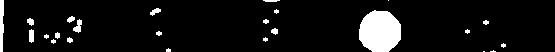

C


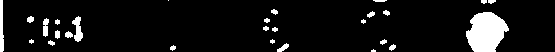

D


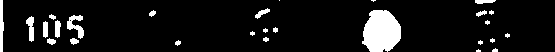

C


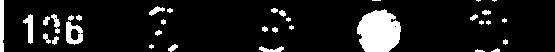

C


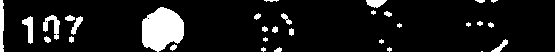

A


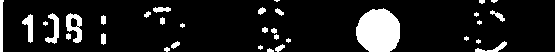

C


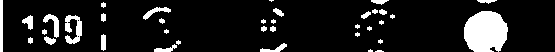

D


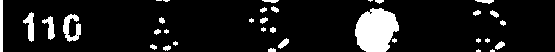

C


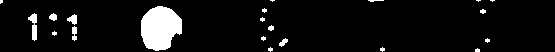

A


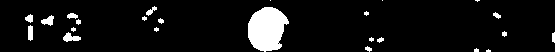

B


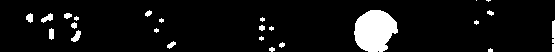

C


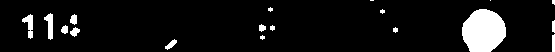

D


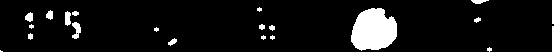

C


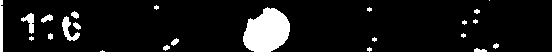

B


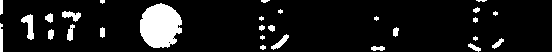

A


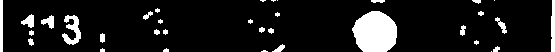

C


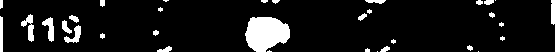

B


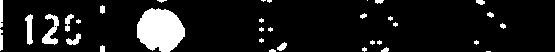

A


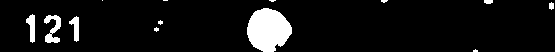

B


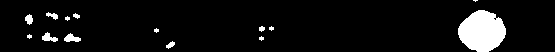

D


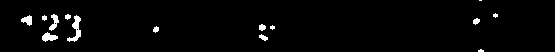

-


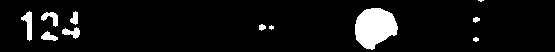

C


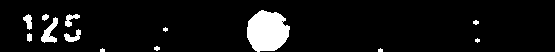

B


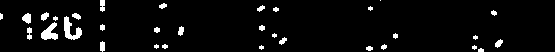

-


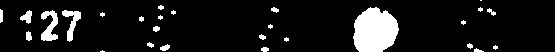

C


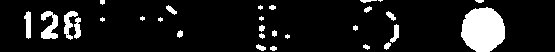

D


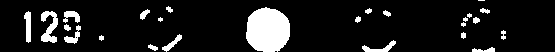

B


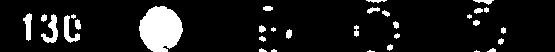

A


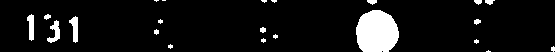

C


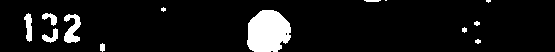

B


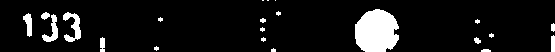

C


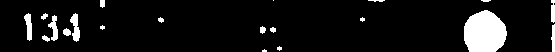

D


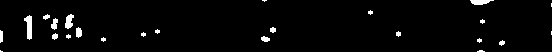

-


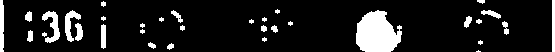

C


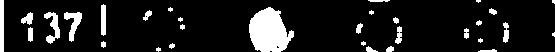

B


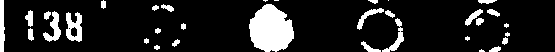

B


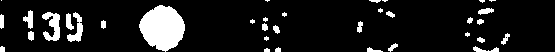

A


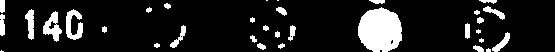

C


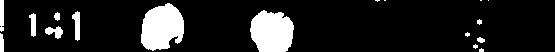

-


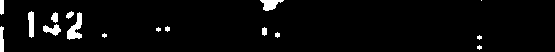

-


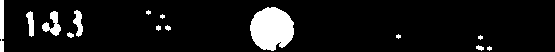

B


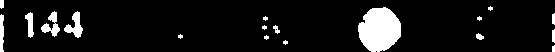

C


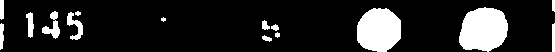

-


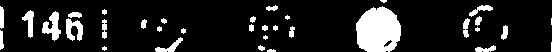

C


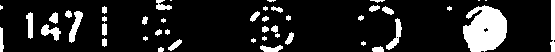

D


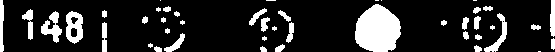

C


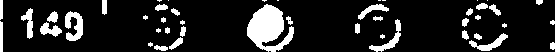

-


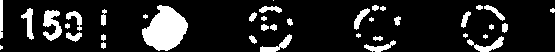

A


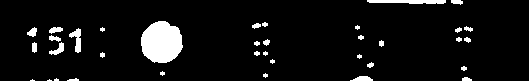

A


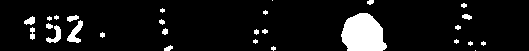

C


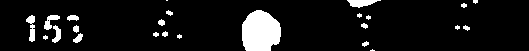

B


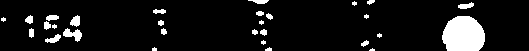

D


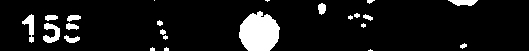

B


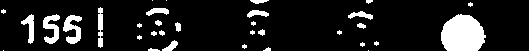

D


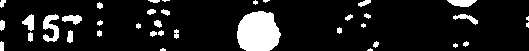

B


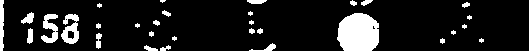

C


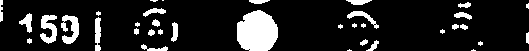

B


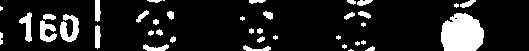

D


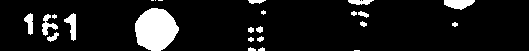

A


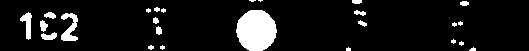

B


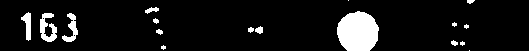

C


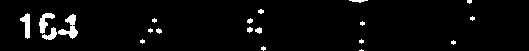

-


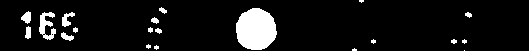

B


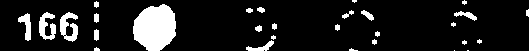

A


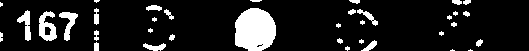

B


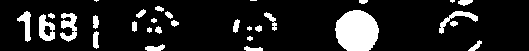

C


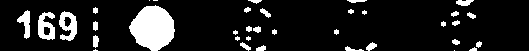

A


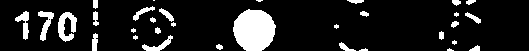

B


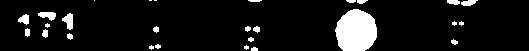

C


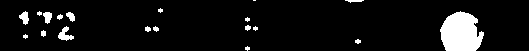

D


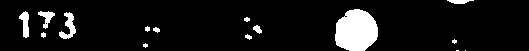

C


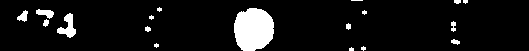

B


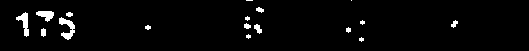

-


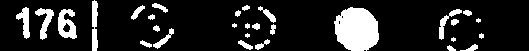

C


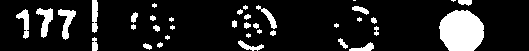

D


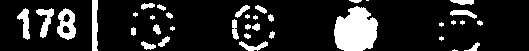

C


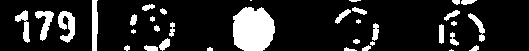

B


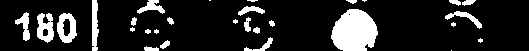

C


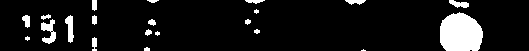

D


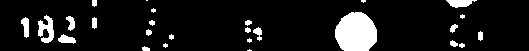

C


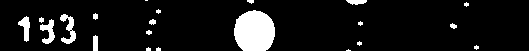

B


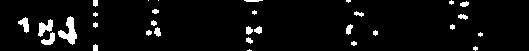

-


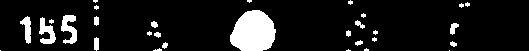

B


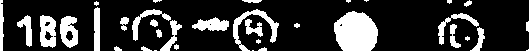

-


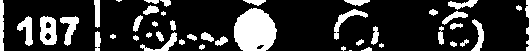

-


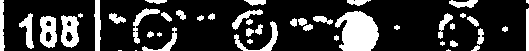

-


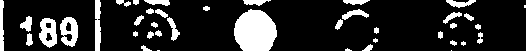

B


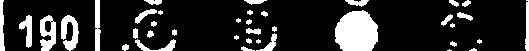

C


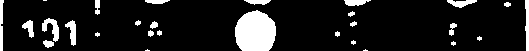

B


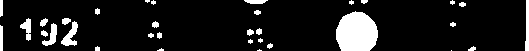

C


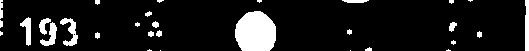

B


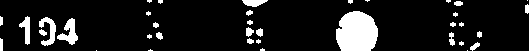

C


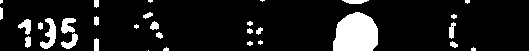

C


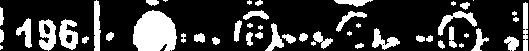

A


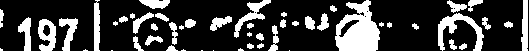

-


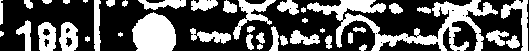

-


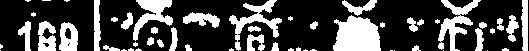

-


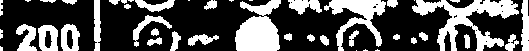

-


In [ ]:
im = cv2.imread(file[0],0)
blurred = cv2.GaussianBlur(im, (11, 11), 0)
edged = cv2.Canny(blurred, 75, 200)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel,iterations = 4)
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = lambda x:cv2.contourArea(x), reverse=True)

nice_cntrs = []
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
      # to compute the aspect ratio
      area = cv2.contourArea(c)
      (x, y, w, h) = cv2.boundingRect(c)

      # compute the aspect ratio of the contour, which is simply the width
      # divided by the height of the bounding box
      aspectRatio = w / float(h)

      if aspectRatio >=0.15 and aspectRatio<=0.3 and w*h>2000:
        nice_cntrs.append(approx)
        
nice_cntrs = sorted(nice_cntrs, key = lambda x: cv2.contourArea(x), reverse = True)[:4]

warped = []
for cnt in nice_cntrs:
  warped.append(four_point_transform(im, cnt.reshape(4, 2)))

thresh = cv2.threshold(warped[0], 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

ans = []
for item in warped:
  thresh = cv2.threshold(item, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
  thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 1)
  ans_temp = _get_answer_for_block(thresh)
  ans += ans_temp


In [ ]:
ans

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'B',
 '-',
 'B',
 'C',
 'A',
 'B',
 'C',
 '-',
 'B',
 '-',
 'B',
 '-',
 'A',
 'B',
 'D',
 'B',
 'A',
 'B',
 'C',
 'B',
 'D',
 'B',
 'C',
 'A',
 'C',
 'B',
 'D',
 'A',
 'B',
 'D',
 'B',
 'A',
 'C',
 'D',
 'B',
 'A',
 '-',
 '-',
 '-',
 '-',
 'B',
 'C',
 'D',
 'A',
 'B',
 'C',
 'D',
 'C',
 'B',
 'A',
 'B',
 'C',
 'D',
 'B',
 'A',
 'B',
 'D',
 'C',
 'B',
 'A',
 'B',
 'D',
 'C',
 'B',
 'A',
 '-',
 'C',
 'B',
 'A',
 '-',
 'C',
 'B',
 'A',
 '-',
 'C',
 'D',
 'C',
 'B',
 'A',
 'B',
 'C',
 'D',
 'C',
 'B',
 'A',
 '-',
 '-',
 'A',
 'B',
 'D',
 'A',
 'B',
 'C',
 'D',
 'C',
 'B',
 'A',
 'B',
 'C',
 'D',
 'C',
 'B',
 'A',
 'B',
 'C',
 'D',
 'C',
 'B',
 'A',
 'B',
 'C',
 'D',
 'C',
 'B',
 'A',
 'B',
 'C',
 '-',
 '-',
 'B',
 '-',
 'B',
 'C',
 '-',
 '-',
 'B',
 'A',
 'B',
 '-',
 '-',
 '-',
 'B',
 'A',
 'B',
 'C',
 'D',
 'C',
 '-',
 '-',
 '-',
 'B',
 'C',
 'A',
 'B',
 'D',
 'B',
 'A',
 'C',
 'B',
 'D',
 'B',
 'A',
 '-',
 'C',
 'A',
 'C',
 'A'

In [ ]:
import pandas as pd
df = pd.read_excel('/content/413_446_728.xlsx')
df.head()

Question Correct Answer 123413 123446 145728
0         1              D      A      A      A
1         2              A      -      D      B
2         3              A      B      C      C
3         4              A      C      A      B
4         5              C      A      C      D

In [ ]:
df['145728_selected'] = ans

In [ ]:
df

Question  ... 145728_correctly_detected
0           1  ...                     False
1           2  ...                     False
2           3  ...                     False
3           4  ...                     False
4           5  ...                     False
..        ...  ...                       ...
195       196  ...                      True
196       197  ...                     False
197       198  ...                     False
198       199  ...                     False
199       200  ...                     False

[200 rows x 11 columns]

In [ ]:
df['123413_correctly_detected'] = df[123413] == df['123413_selected']
df['123446_correctly_detected'] = df[123446] == df['123446_selected']
df['145728_correctly_detected'] = df[145728] == df['145728_selected']

In [ ]:
df['123413_calculated_score'] = df[123413] == df['Correct Answer']
df['123446_calculated_score'] = df[123446] == df['Correct Answer']
df['145728_calculated_score'] = df[145728] == df['Correct Answer']

In [ ]:
fig_123413_correct = np.sum(df['123413_correctly_detected'])
fig_123413_correct

191

In [ ]:
fig_123413_correct_percent = np.sum(df['123413_correctly_detected']) / 2
fig_123446_correct_percent = np.sum(df['123446_correctly_detected']) / 2
fig_145728_correct_percent = np.sum(df['145728_correctly_detected']) / 2
fig_123413_correct_percent, fig_123446_correct_percent, fig_145728_correct_percent

(95.5, 95.0, 32.0)

In [ ]:
fig_123413_calculated_score = np.sum(df['123413_calculated_score']) 
fig_123446_calculated_score = np.sum(df['123446_calculated_score']) 
fig_145728_calculated_score = np.sum(df['145728_calculated_score'])
fig_123413_calculated_score, fig_123446_calculated_score, fig_145728_calculated_score

(44, 46, 46)

In [ ]:
((fig_123413_calculated_score - 44) + (fig_123446_calculated_score - 43) + (fig_145728_calculated_score - 41) )/ 3

2.6666666666666665